## Laboratorio 2: Análisis exploratorio en un problema de clasificación

### Utilizaremos en esta práctica las siguientes librerías
[numpy](http://www.numpy.org/) permite manipular matrices de modo sencillo e incorpora funciones de cálculo útiles.  
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
[re](https://docs.python.org/2/library/re.html#) permite manipular expresiones regulares.

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip3 install brewer2mpl

In [3]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


# Para eliminar bordes en gráficas

def elimina_borde(axes=None, top=False, right=False, left=True, bottom=True):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    # Eliminar marcas
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    # Rehabilitar visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Clasificación de aceites de oliva italianos

El punto de partida es una colección de datos extraídos de un conjunto de diferentes aceites de oliva. Cada muestra de aceite se representa mediante ocho parámetros, que se corresponden con los niveles de distintos ácidos grasos en cada aceite. Cada muestra de aceite pertenece a una de entre nueve variedades de aceite de oliva, de tres regiones y ocho áreas geográficas distintas de Italia. El objetivo del análisis es desarrollar un conjunto de reglas de clasificación que permitan distinguir de modo fiable los nueve aceites. Este es un problema de interés práctico, porque el aceite de algunas de las zonas está muy bien valorado, y existe cierto nivel de fraude en la denominación de origen. Además, el contenido en ácidos grasos varía con el clima, lo que resulta relevante para decidir qué variedades se han de plantar en según qué zonas. 

** Fuente: **  
Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214.

Número de muestras: 572

Número de variables: 10

*Descripción:* Los datos representan el porcentaje (x100) de ácidos grasos en la fracción lipídica de un conjunto de muestras de aceites de oliva procedentes de Italia. Los datos proceden de un estudio cuyo objetivo es la determinación de la autenticidad de la denominación de origen en el aceite de oliva.

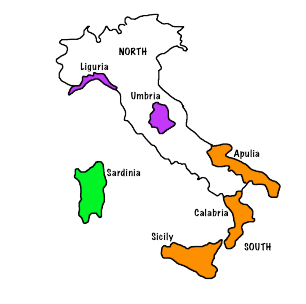

In [5]:
from IPython.display import Image
Image(filename='Italy.png')

## 1. Cargamos y limpiamos los datos
Cargamos los datos desde el fichero oliva.csv mediante las librerías pandas y visualizamos al menos las 5 primeras filas de datos. Como el fichero está en formato csv buscamos la existencia de alguna función en pandas de nombre `read_csv()`.

In [6]:
#almacenamos los datos del fichero en el objeto 'datos', de tipo Dataframe
# Cargar los datos desde el archivo CSV
df = pd.read_csv('oliva.csv')

# Visualizar las primeras 5 filas de datos 
# df.head(num_filas_show) num_filas_show el default es 5 
# df.head(5) = df.head()
print(df.head(5))



      Unnamed: 0  región  área  palmítico  palmitoleico  esteárico  oleico  linoleico  linolénico  araquídico  eicosenoico
0  1.Puglia-Nord       1     1       1075            75        226    7823        672          36          60           29
1  2.Puglia-Nord       1     1       1088            73        224    7709        781          31          61           29
2  3.Puglia-Nord       1     1        911            54        246    8113        549          31          63           29
3  4.Puglia-Nord       1     1        966            57        240    7952        619          50          78           35
4  5.Puglia-Nord       1     1       1051            67        259    7771        672          50          80           46


Pondremos nombre a la primera columna, que carece de él. Para ello podemos consultar la existencia de alguna función en pandas de nombre `rename()`.

In [7]:
def plot_table(df):
    #función para aplicar el estilo de fondo alternado por filas enteras
    def alternating_background_color(row):
        #print(row.name)
        val=row.name
        if isinstance(val, str):
            val = int(val.split('.')[0])-1
        if val % 2 == 0:
            return ['background-color: lightblue; border: 1px solid black; text-align: center;'] * len(row)
        else:
            return ['background-color: lighgray; border: 1px solid black; text-align: center;'] * len(row)

    
    # Aplica la función a las filas enteras del DataFrame y al índice
    styled_df = df.style.apply(alternating_background_color, axis=1)
    return styled_df




In [8]:
# Mostrar el DataFrame con el formato aplicado
plot_table(df.head(5))


,Unnamed: 0,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,1.Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,2.Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,3.Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,4.Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,5.Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46


In [9]:
df = pd.read_csv('oliva.csv')
# Imprimimos en primer lugar los títulos de las columnas, que se encuentran en datos.columns
print(df.columns)
# Cambiamos columns[0] por 'procedencia'
df.rename(columns={df.columns[0]: 'procedencia'}, inplace=True)
print(df.columns)
plot_table(df.head(5))

Index(['Unnamed: 0', 'región', 'área', 'palmítico', 'palmitoleico', 'esteárico', 'oleico', 'linoleico', 'linolénico', 'araquídico', 'eicosenoico'], dtype='object')
Index(['procedencia', 'región', 'área', 'palmítico', 'palmitoleico', 'esteárico', 'oleico', 'linoleico', 'linolénico', 'araquídico', 'eicosenoico'], dtype='object')


,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,1.Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,2.Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,3.Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,4.Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,5.Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46


In [10]:
df_p=df.copy()
# En este caso cambiamos el indice para para que data frame nos deje visualizar la procedencia
# sin tener que selecionar esta columna 
df_p.set_index("procedencia",inplace=True)
#plot_table(df.head(5))

In [11]:
plot_table(df_p.head(5))

,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
procedencia,,,,,,,,,,
1.Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
2.Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
3.Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
4.Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
5.Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46


Queremos acceder a la subtabla formada por las columnas `oleico` y `linoleico`.

In [12]:
oleo_p=df_p.loc[:,["oleico","linoleico"]]
plot_table(oleo_p.head(5))

,oleico,linoleico
procedencia,,
1.Puglia-Nord,7823,672
2.Puglia-Nord,7709,781
3.Puglia-Nord,8113,549
4.Puglia-Nord,7952,619
5.Puglia-Nord,7771,672


In [13]:
oleo=df.loc[:,["procedencia","oleico","linoleico"]]
plot_table(oleo.head(5))

,procedencia,oleico,linoleico
0,1.Puglia-Nord,7823,672
1,2.Puglia-Nord,7709,781
2,3.Puglia-Nord,8113,549
3,4.Puglia-Nord,7952,619
4,5.Puglia-Nord,7771,672


In [14]:
subtabla_oleico_linoleico=df.loc[:,["oleico","linoleico"]]
# la podemos visualizar de forma traspuesta al ser solo dos
subtabla_oleico_linoleico.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571
oleico,7823,7709,8113,7952,7771,7924,7990,7728,7745,7944,7978,7868,7728,8018,7795,7606,7840,7344,7958,7820,7692,7806,7703,7876,7779,7299,7174,7234,7127,7253,7285,7083,7257,7337,7309,7441,7395,7323,7299,7209,7354,7238,7160,7129,7351,7351,7394,7167,7261,7262,...,7340,7550,7530,7600,7480,7680,7620,7740,7530,7760,7600,7610,7590,7720,7540,7810,7780,7600,7610,7850,7620,7700,7450,7690,7630,7630,7780,7810,7620,7620,7610,7720,7710,7820,7810,7710,7800,7650,7710,7630,7820,7720,7810,7720,7730,7490,7740,7720,7750,7950
linoleico,672,781,549,619,672,678,618,734,709,633,605,661,747,655,780,816,788,957,742,736,716,679,700,703,696,832,950,874,940,903,892,915,870,820,823,798,829,819,840,866,870,877,928,897,757,839,786,939,925,780,...,1020,1000,1030,990,1050,830,880,900,970,980,990,850,860,910,1040,940,930,1010,730,690,960,1020,1010,850,1030,940,820,810,920,1010,930,910,900,830,840,910,850,830,800,770,760,810,750,950,870,790,810,970,870,740


In [15]:
subtabla_oleico_linoleico=df.loc[:,["procedencia","oleico","linoleico"]]
subtabla_oleico_linoleico.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571
procedencia,1.Puglia-Nord,2.Puglia-Nord,3.Puglia-Nord,4.Puglia-Nord,5.Puglia-Nord,6.Puglia-Nord,7.Puglia-Nord,8.Puglia-Nord,9.Puglia-Nord,10.Puglia-Nord,11.Puglia-Nord,12.Puglia-Nord,13.Puglia-Nord,14.Puglia-Nord,15.Puglia-Nord,16.Puglia-Nord,17.Puglia-Nord,18.Puglia-Nord,19.Puglia-Nord,20.Puglia-Nord,21.Puglia-Nord,22.Puglia-Nord,23.Puglia-Nord,24.Puglia-Nord,25.Puglia-Nord,26.Calabria,27.Calabria,28.Calabria,29.Calabria,30.Calabria,31.Calabria,32.Calabria,33.Calabria,34.Calabria,35.Calabria,36.Calabria,37.Calabria,38.Calabria,39.Calabria,40.Calabria,41.Calabria,42.Calabria,43.Calabria,44.Calabria,45.Calabria,46.Calabria,47.Calabria,48.Calabria,49.Calabria,50.Calabria,...,523.Liguria-Ovest,524.Liguria-Ovest,525.Liguria-Ovest,526.Liguria-Ovest,527.Liguria-Ovest,528.Liguria-Ovest,529.Liguria-Ovest,530.Liguria-Ovest,531.Liguria-Ovest,532.Liguria-Ovest,533.Liguria-Ovest,534.Liguria-Ovest,535.Liguria-Ovest,536.Liguria-Ovest,537.Liguria-Ovest,538.Liguria-Ovest,539.Liguria-Ovest,540.Liguria-Ovest,541.Liguria-Ovest,542.Liguria-Ovest,543.Liguria-Ovest,544.Liguria-Ovest,545.Liguria-Ovest,546.Liguria-Ovest,547.Liguria-Ovest,548.Liguria-Ovest,549.Liguria-Ovest,550.Liguria-Ovest,551.Liguria-Ovest,552.Liguria-Ovest,553.Liguria-Ovest,554.Liguria-Ovest,555.Liguria-Ovest,556.Liguria-Ovest,557.Liguria-Ovest,558.Liguria-Ovest,559.Liguria-Ovest,560.Liguria-Ovest,561.Liguria-Ovest,562.Liguria-Ovest,563.Liguria-Ovest,564.Liguria-Ovest,565.Liguria-Ovest,566.Liguria-Ovest,567.Liguria-Ovest,568.Liguria-Ovest,569.Liguria-Ovest,570.Liguria-Ovest,571.Liguria-Ovest,572.Liguria-Ovest
oleico,7823,7709,8113,7952,7771,7924,7990,7728,7745,7944,7978,7868,7728,8018,7795,7606,7840,7344,7958,7820,7692,7806,7703,7876,7779,7299,7174,7234,7127,7253,7285,7083,7257,7337,7309,7441,7395,7323,7299,7209,7354,7238,7160,7129,7351,7351,7394,7167,7261,7262,...,7340,7550,7530,7600,7480,7680,7620,7740,7530,7760,7600,7610,7590,7720,7540,7810,7780,7600,7610,7850,7620,7700,7450,7690,7630,7630,7780,7810,7620,7620,7610,7720,7710,7820,7810,7710,7800,7650,7710,7630,7820,7720,7810,7720,7730,7490,7740,7720,7750,7950
linoleico,672,781,549,619,672,678,618,734,709,633,605,661,747,655,780,816,788,957,742,736,716,679,700,703,696,832,950,874,940,903,892,915,870,820,823,798,829,819,840,866,870,877,928,897,757,839,786,939,925,780,...,1020,1000,1030,990,1050,830,880,900,970,980,990,850,860,910,1040,940,930,1010,730,690,960,1020,1010,850,1030,940,820,810,920,1010,930,910,900,830,840,910,850,830,800,770,760,810,750,950,870,790,810,970,870,740


In [16]:
subtabla_oleico_linoleico_p=df_p.loc[:,["oleico","linoleico"]]
# aqui se puede observar que no es necesaio añadir la procedencia
subtabla_oleico_linoleico_p.T

procedencia,1.Puglia-Nord,2.Puglia-Nord,3.Puglia-Nord,4.Puglia-Nord,5.Puglia-Nord,6.Puglia-Nord,7.Puglia-Nord,8.Puglia-Nord,9.Puglia-Nord,10.Puglia-Nord,11.Puglia-Nord,12.Puglia-Nord,13.Puglia-Nord,14.Puglia-Nord,15.Puglia-Nord,16.Puglia-Nord,17.Puglia-Nord,18.Puglia-Nord,19.Puglia-Nord,20.Puglia-Nord,21.Puglia-Nord,22.Puglia-Nord,23.Puglia-Nord,24.Puglia-Nord,25.Puglia-Nord,26.Calabria,27.Calabria,28.Calabria,29.Calabria,30.Calabria,31.Calabria,32.Calabria,33.Calabria,34.Calabria,35.Calabria,36.Calabria,37.Calabria,38.Calabria,39.Calabria,40.Calabria,41.Calabria,42.Calabria,43.Calabria,44.Calabria,45.Calabria,46.Calabria,47.Calabria,48.Calabria,49.Calabria,50.Calabria,...,523.Liguria-Ovest,524.Liguria-Ovest,525.Liguria-Ovest,526.Liguria-Ovest,527.Liguria-Ovest,528.Liguria-Ovest,529.Liguria-Ovest,530.Liguria-Ovest,531.Liguria-Ovest,532.Liguria-Ovest,533.Liguria-Ovest,534.Liguria-Ovest,535.Liguria-Ovest,536.Liguria-Ovest,537.Liguria-Ovest,538.Liguria-Ovest,539.Liguria-Ovest,540.Liguria-Ovest,541.Liguria-Ovest,542.Liguria-Ovest,543.Liguria-Ovest,544.Liguria-Ovest,545.Liguria-Ovest,546.Liguria-Ovest,547.Liguria-Ovest,548.Liguria-Ovest,549.Liguria-Ovest,550.Liguria-Ovest,551.Liguria-Ovest,552.Liguria-Ovest,553.Liguria-Ovest,554.Liguria-Ovest,555.Liguria-Ovest,556.Liguria-Ovest,557.Liguria-Ovest,558.Liguria-Ovest,559.Liguria-Ovest,560.Liguria-Ovest,561.Liguria-Ovest,562.Liguria-Ovest,563.Liguria-Ovest,564.Liguria-Ovest,565.Liguria-Ovest,566.Liguria-Ovest,567.Liguria-Ovest,568.Liguria-Ovest,569.Liguria-Ovest,570.Liguria-Ovest,571.Liguria-Ovest,572.Liguria-Ovest
oleico,7823,7709,8113,7952,7771,7924,7990,7728,7745,7944,7978,7868,7728,8018,7795,7606,7840,7344,7958,7820,7692,7806,7703,7876,7779,7299,7174,7234,7127,7253,7285,7083,7257,7337,7309,7441,7395,7323,7299,7209,7354,7238,7160,7129,7351,7351,7394,7167,7261,7262,...,7340,7550,7530,7600,7480,7680,7620,7740,7530,7760,7600,7610,7590,7720,7540,7810,7780,7600,7610,7850,7620,7700,7450,7690,7630,7630,7780,7810,7620,7620,7610,7720,7710,7820,7810,7710,7800,7650,7710,7630,7820,7720,7810,7720,7730,7490,7740,7720,7750,7950
linoleico,672,781,549,619,672,678,618,734,709,633,605,661,747,655,780,816,788,957,742,736,716,679,700,703,696,832,950,874,940,903,892,915,870,820,823,798,829,819,840,866,870,877,928,897,757,839,786,939,925,780,...,1020,1000,1030,990,1050,830,880,900,970,980,990,850,860,910,1040,940,930,1010,730,690,960,1020,1010,850,1030,940,820,810,920,1010,930,910,900,830,840,910,850,830,800,770,760,810,750,950,870,790,810,970,870,740


El resultado es un nuevo objeto, del tipo `DataFrame` de pandas. Queremos ahora acceder a una sola de las columnas, por ejemplo, la del ácido esteárico.

In [17]:
name="esteárico"
print(f"Columna de {name}")
df[name].T


Columna de esteárico


0      226
1      224
2      246
3      240
4      259
      ... 
567    290
568    270
569    210
570    250
571    240
Name: esteárico, Length: 572, dtype: int64

In [18]:
print(f"Tabla con la columna de {name}")
df.loc[:,[name]]

Tabla con la columna de esteárico


,esteárico
0,226
1,224
2,246
3,240
4,259
...,...
567,290
568,270
569,210
570,250


In [19]:
print(f"Tabla con la columna de {name}")
df.loc[:,[name]].T

Tabla con la columna de esteárico


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571
esteárico,226,224,246,240,259,268,264,235,239,213,219,235,214,243,254,201,183,205,195,258,236,288,247,234,245,230,217,246,272,245,215,318,241,189,253,221,283,244,313,236,228,312,279,287,300,215,244,259,301,351,...,290,210,220,210,350,240,270,230,250,220,230,220,230,300,330,200,210,210,250,310,290,220,220,240,250,350,250,250,350,260,350,340,250,300,210,240,240,300,290,280,240,250,230,210,220,290,270,210,250,240


In [20]:
print(f"Tabla con la columna de {name}")
df_p.loc[:,[name]].T

Tabla con la columna de esteárico


procedencia,1.Puglia-Nord,2.Puglia-Nord,3.Puglia-Nord,4.Puglia-Nord,5.Puglia-Nord,6.Puglia-Nord,7.Puglia-Nord,8.Puglia-Nord,9.Puglia-Nord,10.Puglia-Nord,11.Puglia-Nord,12.Puglia-Nord,13.Puglia-Nord,14.Puglia-Nord,15.Puglia-Nord,16.Puglia-Nord,17.Puglia-Nord,18.Puglia-Nord,19.Puglia-Nord,20.Puglia-Nord,21.Puglia-Nord,22.Puglia-Nord,23.Puglia-Nord,24.Puglia-Nord,25.Puglia-Nord,26.Calabria,27.Calabria,28.Calabria,29.Calabria,30.Calabria,31.Calabria,32.Calabria,33.Calabria,34.Calabria,35.Calabria,36.Calabria,37.Calabria,38.Calabria,39.Calabria,40.Calabria,41.Calabria,42.Calabria,43.Calabria,44.Calabria,45.Calabria,46.Calabria,47.Calabria,48.Calabria,49.Calabria,50.Calabria,...,523.Liguria-Ovest,524.Liguria-Ovest,525.Liguria-Ovest,526.Liguria-Ovest,527.Liguria-Ovest,528.Liguria-Ovest,529.Liguria-Ovest,530.Liguria-Ovest,531.Liguria-Ovest,532.Liguria-Ovest,533.Liguria-Ovest,534.Liguria-Ovest,535.Liguria-Ovest,536.Liguria-Ovest,537.Liguria-Ovest,538.Liguria-Ovest,539.Liguria-Ovest,540.Liguria-Ovest,541.Liguria-Ovest,542.Liguria-Ovest,543.Liguria-Ovest,544.Liguria-Ovest,545.Liguria-Ovest,546.Liguria-Ovest,547.Liguria-Ovest,548.Liguria-Ovest,549.Liguria-Ovest,550.Liguria-Ovest,551.Liguria-Ovest,552.Liguria-Ovest,553.Liguria-Ovest,554.Liguria-Ovest,555.Liguria-Ovest,556.Liguria-Ovest,557.Liguria-Ovest,558.Liguria-Ovest,559.Liguria-Ovest,560.Liguria-Ovest,561.Liguria-Ovest,562.Liguria-Ovest,563.Liguria-Ovest,564.Liguria-Ovest,565.Liguria-Ovest,566.Liguria-Ovest,567.Liguria-Ovest,568.Liguria-Ovest,569.Liguria-Ovest,570.Liguria-Ovest,571.Liguria-Ovest,572.Liguria-Ovest
esteárico,226,224,246,240,259,268,264,235,239,213,219,235,214,243,254,201,183,205,195,258,236,288,247,234,245,230,217,246,272,245,215,318,241,189,253,221,283,244,313,236,228,312,279,287,300,215,244,259,301,351,...,290,210,220,210,350,240,270,230,250,220,230,220,230,300,330,200,210,210,250,310,290,220,220,240,250,350,250,250,350,260,350,340,250,300,210,240,240,300,290,280,240,250,230,210,220,290,270,210,250,240


El objeto obtenido es un objeto del tipo `Series` de pandas. Si utilizamos dos corchetes para indexar a partir de una lista obtendremos un objeto de tipo Dataframe. Analizaremos los tipos de ambos ejemplos mediante la función `type()`. 

Se puede ver en el apartado anterior la diferencia visual

In [21]:
#print ("tipo de datos[[u'esteárico']]:\t", type(datos[[u'esteárico']]))
#print ("tipo de datos[u'esteárico']:\t", type(datos[u'esteárico']))
print ("tipo de datos[[u'esteárico']]:\t", type(df[[u'esteárico']]))
print ("tipo de datos[u'esteárico']:\t", type(df[u'esteárico']))

tipo de datos[[u'esteárico']]:	 <class 'pandas.core.frame.DataFrame'>
tipo de datos[u'esteárico']:	 <class 'pandas.core.series.Series'>


Si los nombres no tienen acentos podemos acceder a cada columna de una manera más sencilla, por ejemplo, mediante `datos.estearico`.
 
 En esta versión de jupyter notebook  si permite acceso pero tambien se pude quitar los acentos tratando el nombre de la del data frame, pero dado que en esta versión si lo permite continuaremos como esta

In [22]:
!pip install unidecode

In [23]:
from unidecode import unidecode

def eliminar_acentos_en_columnas(dataframe, columnas):
    """
    Elimina los acentos de los caracteres en las columnas especificadas de un DataFrame de pandas.

    Args:
        dataframe (pd.DataFrame): El DataFrame en el que se realizará la eliminación de acentos.
        columnas (list): Lista de nombres de las columnas en las que se eliminarán los acentos.

    Returns:
        pd.DataFrame: El DataFrame original con los acentos eliminados en las columnas especificadas.
    """
    df_copia = dataframe.copy()
    # para  quitar los acentos el contenido de las columnas
    for columna in columnas:
        df_copia[columna] = df_copia[columna].apply(lambda x: unidecode(str(x)))
    for i,x in enumerate(df_copia.columns):
        df_copia.rename(columns={df.columns[i]: unidecode(str(x))}, inplace=True)
    #columnas_sin_acentos= [unidecode(str(x)) for x in df_sin_acentos.columns]
    return df_copia

df_sin_acentos = eliminar_acentos_en_columnas(df, [df.columns[0]])
display(df_sin_acentos)

,procedencia,region,area,palmitico,palmitoleico,estearico,oleico,linoleico,linolenico,araquidico,eicosenoico
0,1.Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,2.Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,3.Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,4.Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,5.Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,568.Liguria-Ovest,3,8,1280,110,290,7490,790,10,10,2
568,569.Liguria-Ovest,3,8,1060,100,270,7740,810,10,10,3
569,570.Liguria-Ovest,3,8,1010,90,210,7720,970,0,0,2
570,571.Liguria-Ovest,3,8,990,120,250,7750,870,10,10,2


In [24]:
!python --version


Python 3.7.16


In [25]:
!jupyter notebook --version

6.5.6


In [26]:
df.esteárico

0      226
1      224
2      246
3      240
4      259
      ... 
567    290
568    270
569    210
570    250
571    240
Name: esteárico, Length: 572, dtype: int64

In [27]:
df_sin_acentos.estearico

0      226
1      224
2      246
3      240
4      259
      ... 
567    290
568    270
569    210
570    250
571    240
Name: estearico, Length: 572, dtype: int64

In [28]:
df.oleico

0      7823
1      7709
2      8113
3      7952
4      7771
       ... 
567    7490
568    7740
569    7720
570    7750
571    7950
Name: oleico, Length: 572, dtype: int64

Volvemos a nuestra tabla de datos. Eliminaremos el número que acompaña a cada región de procedencia, ya que se extrajo del fichero junto con el nombre porque ambos aparecen separados por un punto. Para ello podemos utilizar tanto la función `split()` como la función `sub()` de la librería `re` de expresiones regulares, junto con la función `map()` para realizar el cambio con cada uno de los elementos de la columna de procedencia.

Apartir de aqui se usara solo df para no generar problemas con el indice en pandas df_p que al querer quitar los numeros de procedencia podria dar problemas, ademas que para  el resto de notebook es mas practico usar df

In [29]:
# Utilizamos una asignación del tipo datos['procedencia']=datos['procedencia'].map()

# Copia del DataFrame original
df_split = df.copy()
# Utiliza la función split() de la librería re junto con map() para dividir la columna 'procedencia' 
# y eliminar el número
df_split['procedencia'] = df_split['procedencia'].map(lambda x: re.split('\.', x)[1])
df_split

,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,Liguria-Ovest,3,8,1280,110,290,7490,790,10,10,2
568,Liguria-Ovest,3,8,1060,100,270,7740,810,10,10,3
569,Liguria-Ovest,3,8,1010,90,210,7720,970,0,0,2
570,Liguria-Ovest,3,8,990,120,250,7750,870,10,10,2


In [30]:
# Copia del DataFrame original
df_split2 = df.copy()
# Aplicar re.split('\.', ...) a cada valor de la columna 'procedencia' junto con apply en vez de map
df_split2['procedencia'] = df_split2['procedencia'].apply(lambda x: re.split('\.', x)[1])
df_split2

,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,Liguria-Ovest,3,8,1280,110,290,7490,790,10,10,2
568,Liguria-Ovest,3,8,1060,100,270,7740,810,10,10,3
569,Liguria-Ovest,3,8,1010,90,210,7720,970,0,0,2
570,Liguria-Ovest,3,8,990,120,250,7750,870,10,10,2


In [31]:
# Copia del DataFrame original
df_split3 = df.copy()
# Utiliza la función sub() de la librería re junto con map() para dividir la columna 'procedencia' 
# y eliminar el número
df_split3['procedencia'] = df_split3['procedencia'].map(lambda x: re.sub(r'^\d+\.\s*', '', x))
df_split3

,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,Liguria-Ovest,3,8,1280,110,290,7490,790,10,10,2
568,Liguria-Ovest,3,8,1060,100,270,7740,810,10,10,3
569,Liguria-Ovest,3,8,1010,90,210,7720,970,0,0,2
570,Liguria-Ovest,3,8,990,120,250,7750,870,10,10,2


Como se pude observar los tres métodos actuan de manera igual sobre el data frame

Resulta un poco confusa la existencia de una columna región y otra área, además de la que nombra la procedencia. Consultaremos qué valores distintos hay en ambas columnas. En este caso es sencillo porque el conjunto de datos no es muy extenso, pero utilizaremos la función `unique()` para hacer este análisis extensivo a cualquier conjunto de datos verdaderamente grande.

In [32]:
valores_region = df_split['región'].unique()
valores_area = df_split['área'].unique()


# Luego puedes imprimir los valores únicos para cada columna:
print("Valores únicos en la columna 'región':")
print(valores_region)

print("\nValores únicos en la columna 'área':")
print(valores_area)



Valores únicos en la columna 'región':
[1 2 3]

Valores únicos en la columna 'área':
[1 2 3 4 5 6 9 7 8]


Necesitamos saber cuántas zonas únicas hay en el conjunto de datos, ya que a ellas asignaremos cada etiqueta de clase. Para ello podemos realizar una tabla de contingencia entre las etiquetas de regiones y las etiquetas de áreas. En python podemos hacer esto mediante la función `crosstab()`.

In [33]:
# Crear una tabla de contingencia que tenga la combinatoria de los valores únicos en las columnas 'región' y 'área' 
# con una nueva columna que indique la suma de las zonas
tabla_contingencia = pd.crosstab(df['región'], df['área'],margins=True, margins_name="Total_zonas")
# Para saber cuántas zonas únicas hay en el conjunto de datos, puedes obtener los índices únicos de ambas columnas y contarlos.

zonas_únicas_región = df['región'].nunique()
zonas_únicas_área = df['área'].nunique()

# Imprimir el número de zonas únicas en cada columna:
print("Número de zonas únicas en la columna 'región':", zonas_únicas_región)
print("Número de zonas únicas en la columna 'área':", zonas_únicas_área)

# Además, puedes imprimir la tabla de contingencia para ver la distribución de las etiquetas de región y área.
print("\nTabla de contingencia:")
print(tabla_contingencia)

Número de zonas únicas en la columna 'región': 3
Número de zonas únicas en la columna 'área': 9

Tabla de contingencia:
área          1   2    3   4   5   6   7   8   9  Total_zonas
región                                                       
1            25  56  206  36   0   0   0   0   0          323
2             0   0    0   0  65  33   0   0   0           98
3             0   0    0   0   0   0  50  50  51          151
Total_zonas  25  56  206  36  65  33  50  50  51          572


Generamos el conjunto de valores diferentes de la columna procedencia mediante la función `unique()`

In [34]:
valores_procedencia = df_split['procedencia'].unique()
print(f"\nNúmero de valores únicos en la columna 'procedencia' es : {valores_procedencia.size} \n \
      Y los valores son :\n {valores_procedencia}  ")



Número de valores únicos en la columna 'procedencia' es : 9 
       Y los valores son :
 ['Puglia-Nord' 'Calabria' 'Puglia-Sud' 'Sicilia' 'Sardinia-Interno'
 'Sardinia-Costa' 'Umbria' 'Liguria-Est' 'Liguria-Ovest']  


Al unique comprobar la igualdad entre valores y tener los indices.procedencia se repiten muchas procedencias por eso lo mejor es eliminar esos numros como se hizo en el apartado anterior

In [35]:
valores_procedencia_con_indice = df['procedencia'].unique()
print(f"\nNumero de valores únicos en la columna 'procedencia':\n {valores_procedencia_con_indice.size}")


Numero de valores únicos en la columna 'procedencia':
 572


### Nota
Como podemos observar en el resultado anterior, se identifican un total de 9 zonas únicas en nuestro conjunto de datos. Es interesante notar que este número coincide con la cantidad de valores únicos que obtuvimos previamente en la columna 'procedencia'. Por lo tanto, estas 9 áreas representan las 9 procedencias distintas que existen en nuestros datos.

Cada una de estas áreas está asociada a una de las 3 regiones. Como se puede apreciar, las áreas 1, 2 y 3 están relacionadas con la región 1; las áreas 4 y 5 corresponden a la región 2; y finalmente, las áreas 7, 8 y 9 están vinculadas a la región 3. Esta información nos proporciona una visión más clara de cómo las áreas se distribuyen en función de las regiones, lo que puede ser de gran utilidad para futuros análisis y toma de decisiones en nuestro conjunto de datos

Recuperaremos los valores originales (en tanto por ciento) de la proporción de cada ácido graso en cada muestra de aceite, porque después su representación gráfica será más fácilmente comprensible. Para ello actuamos sobre las columnas que representan las proporciones de los ácidos grasos. Podemos utilizar la función `apply()` para dividir todos los valores entre 100.

In [36]:
# Definimos una lista con los nombres de los distintos ácidos

# Define la función que aplicarás condicionalmente
def aplicar_si_no_cx(columna,not_chage):
    # Verifica si se puede modificar o no
    if columna.name in not_chage:
        return columna / 100
    else:
        return columna

# Obtener una lista de todas las columnas en el DataFrame
todas_columnas = df.columns.tolist()
# Columnas que no son acidos
columnas_a_eliminar = ['procedencia', 'área', 'región']
# Crear una nueva lista que excluya las columnas que no se desean modificar
acidos = [col for col in todas_columnas if col not in columnas_a_eliminar]
print("Nombres de los acidos:\n",acidos)
# Accedemos a cada uno de los valores de cada una de las columnas y lo dividimos entre 100 mediante apply()
# de este manera estamos eliminando columnas qe no sean numericas 
# df_en_porcentaje = df.loc[:, acidos].apply(lambda x: x/100) 
# En esta solo modificamos las columnas que queremos y dejamos las otras igual
df_en_porcentaje = df_split.apply(aplicar_si_no_cx,args=(acidos,))

Nombres de los acidos:
 ['palmítico', 'palmitoleico', 'esteárico', 'oleico', 'linoleico', 'linolénico', 'araquídico', 'eicosenoico']


In [37]:
print('Tabla con los valores original')
df_split.head(5)

Tabla con los valores original


,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,1075,75,226,7823,672,36,60,29
1,Puglia-Nord,1,1,1088,73,224,7709,781,31,61,29
2,Puglia-Nord,1,1,911,54,246,8113,549,31,63,29
3,Puglia-Nord,1,1,966,57,240,7952,619,50,78,35
4,Puglia-Nord,1,1,1051,67,259,7771,672,50,80,46


In [38]:
print('Tabla con los valores en porcentaje')
df_en_porcentaje.head(5)

Tabla con los valores en porcentaje


,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,Puglia-Nord,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,Puglia-Nord,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,Puglia-Nord,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,Puglia-Nord,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


Podemos comprobar que la composición de ácidos grasos es consistente, es decir, que la suma de las proporciones de los ácidos grasos para cada muestra se mantiene próximo al 100%.

In [39]:
# 'acidos' contiene las columnas de ácidos grasos que se deseas sumar.

df_porcentajes = df_en_porcentaje.assign(total=df_en_porcentaje[acidos].sum(axis=1))
df_porcentajes.head(5)

,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico,total
0,Puglia-Nord,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,99.96
1,Puglia-Nord,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,99.96
2,Puglia-Nord,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,99.96
3,Puglia-Nord,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,99.97
4,Puglia-Nord,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,99.96


Representamos mediante gráficos de dispersión los datos correspondientes a la presencia de ácido palmítico y ácido palmitoleico en el total de las muestras. Las librerías pyplot utilizan la noción de figura actual y ejes actuales. Para realizar esta figura podemos hacer uso de la función `scatter()`. También podemos utilizar las funciones `set_title()`, `set_xlabel()` y `set_ylabel()` para añadir rótulos a la figura a partir del objeto que representa los ejes, que podemos extraer mediante la función `gca()`.

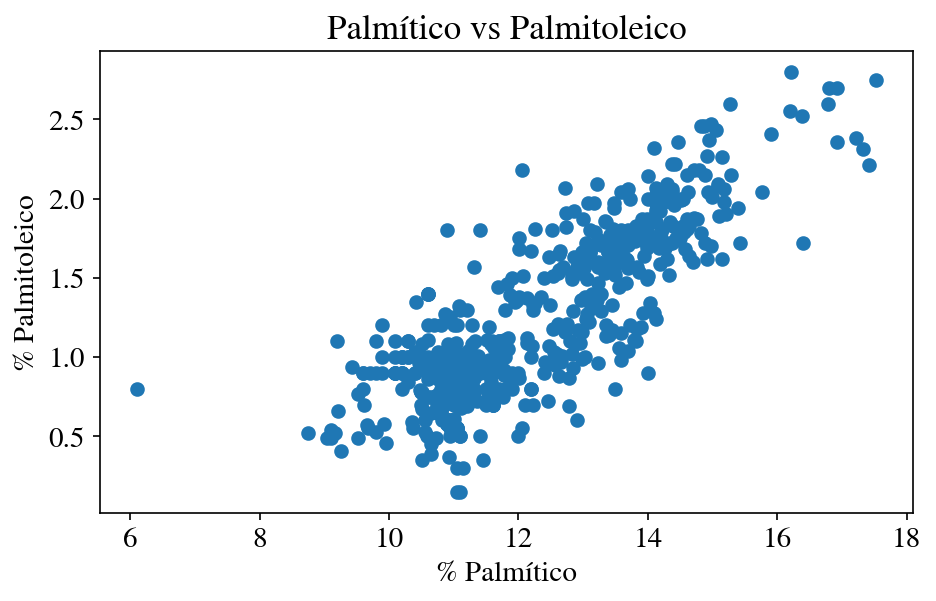

In [40]:
# Definimos la figura actual
fig=plt.figure(figsize=(7, 4))

# Definimos los ejes actuales
axis = fig.gca()

# Introducimos título de la figura y de los ejes a partir del objeto axis
axis.set_title(u'Palmítico vs Palmitoleico')
axis.set_xlabel(u'% Palmítico')
axis.set_ylabel(u'% Palmitoleico')
# Crear un gráfico de dispersión directamente
axis.scatter(df_en_porcentaje["palmítico"], df_en_porcentaje["palmitoleico"])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


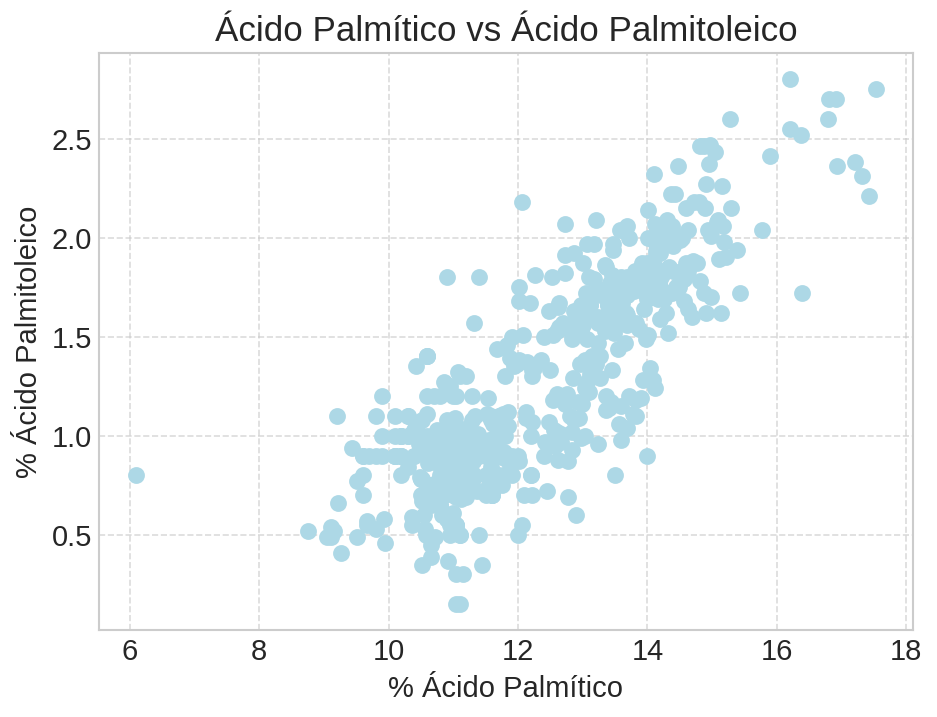

In [41]:
# Define el tamaño y el estilo del gráfico
plt.figure(figsize=(7, 5))
plt.style.use('seaborn-whitegrid')  # Utiliza un estilo de cuadrícula

# Crea un gráfico de dispersión con etiquetas para los puntos
plt.scatter(
    df_en_porcentaje["palmítico"],
    df_en_porcentaje["palmitoleico"],
    color='lightblue',  # Color de los puntos
    marker='o',    # Forma de los puntos
    s=50           # Tamaño de los puntos
)

# Establece el título y etiquetas de los ejes con caracteres Unicode
plt.title('Ácido Palmítico vs Ácido Palmitoleico')
plt.xlabel('% Ácido Palmítico')
plt.ylabel('% Ácido Palmitoleico')

# Agrega una leyenda
plt.legend()

# Agrega una cuadrícula en el fondo
plt.grid(True, linestyle='--', alpha=0.7)


Representamos gráficamente el histograma de la presencia de ácido palmitoleico en el conjunto de muestras. Hacemos uso para ello de la función `hist()`.

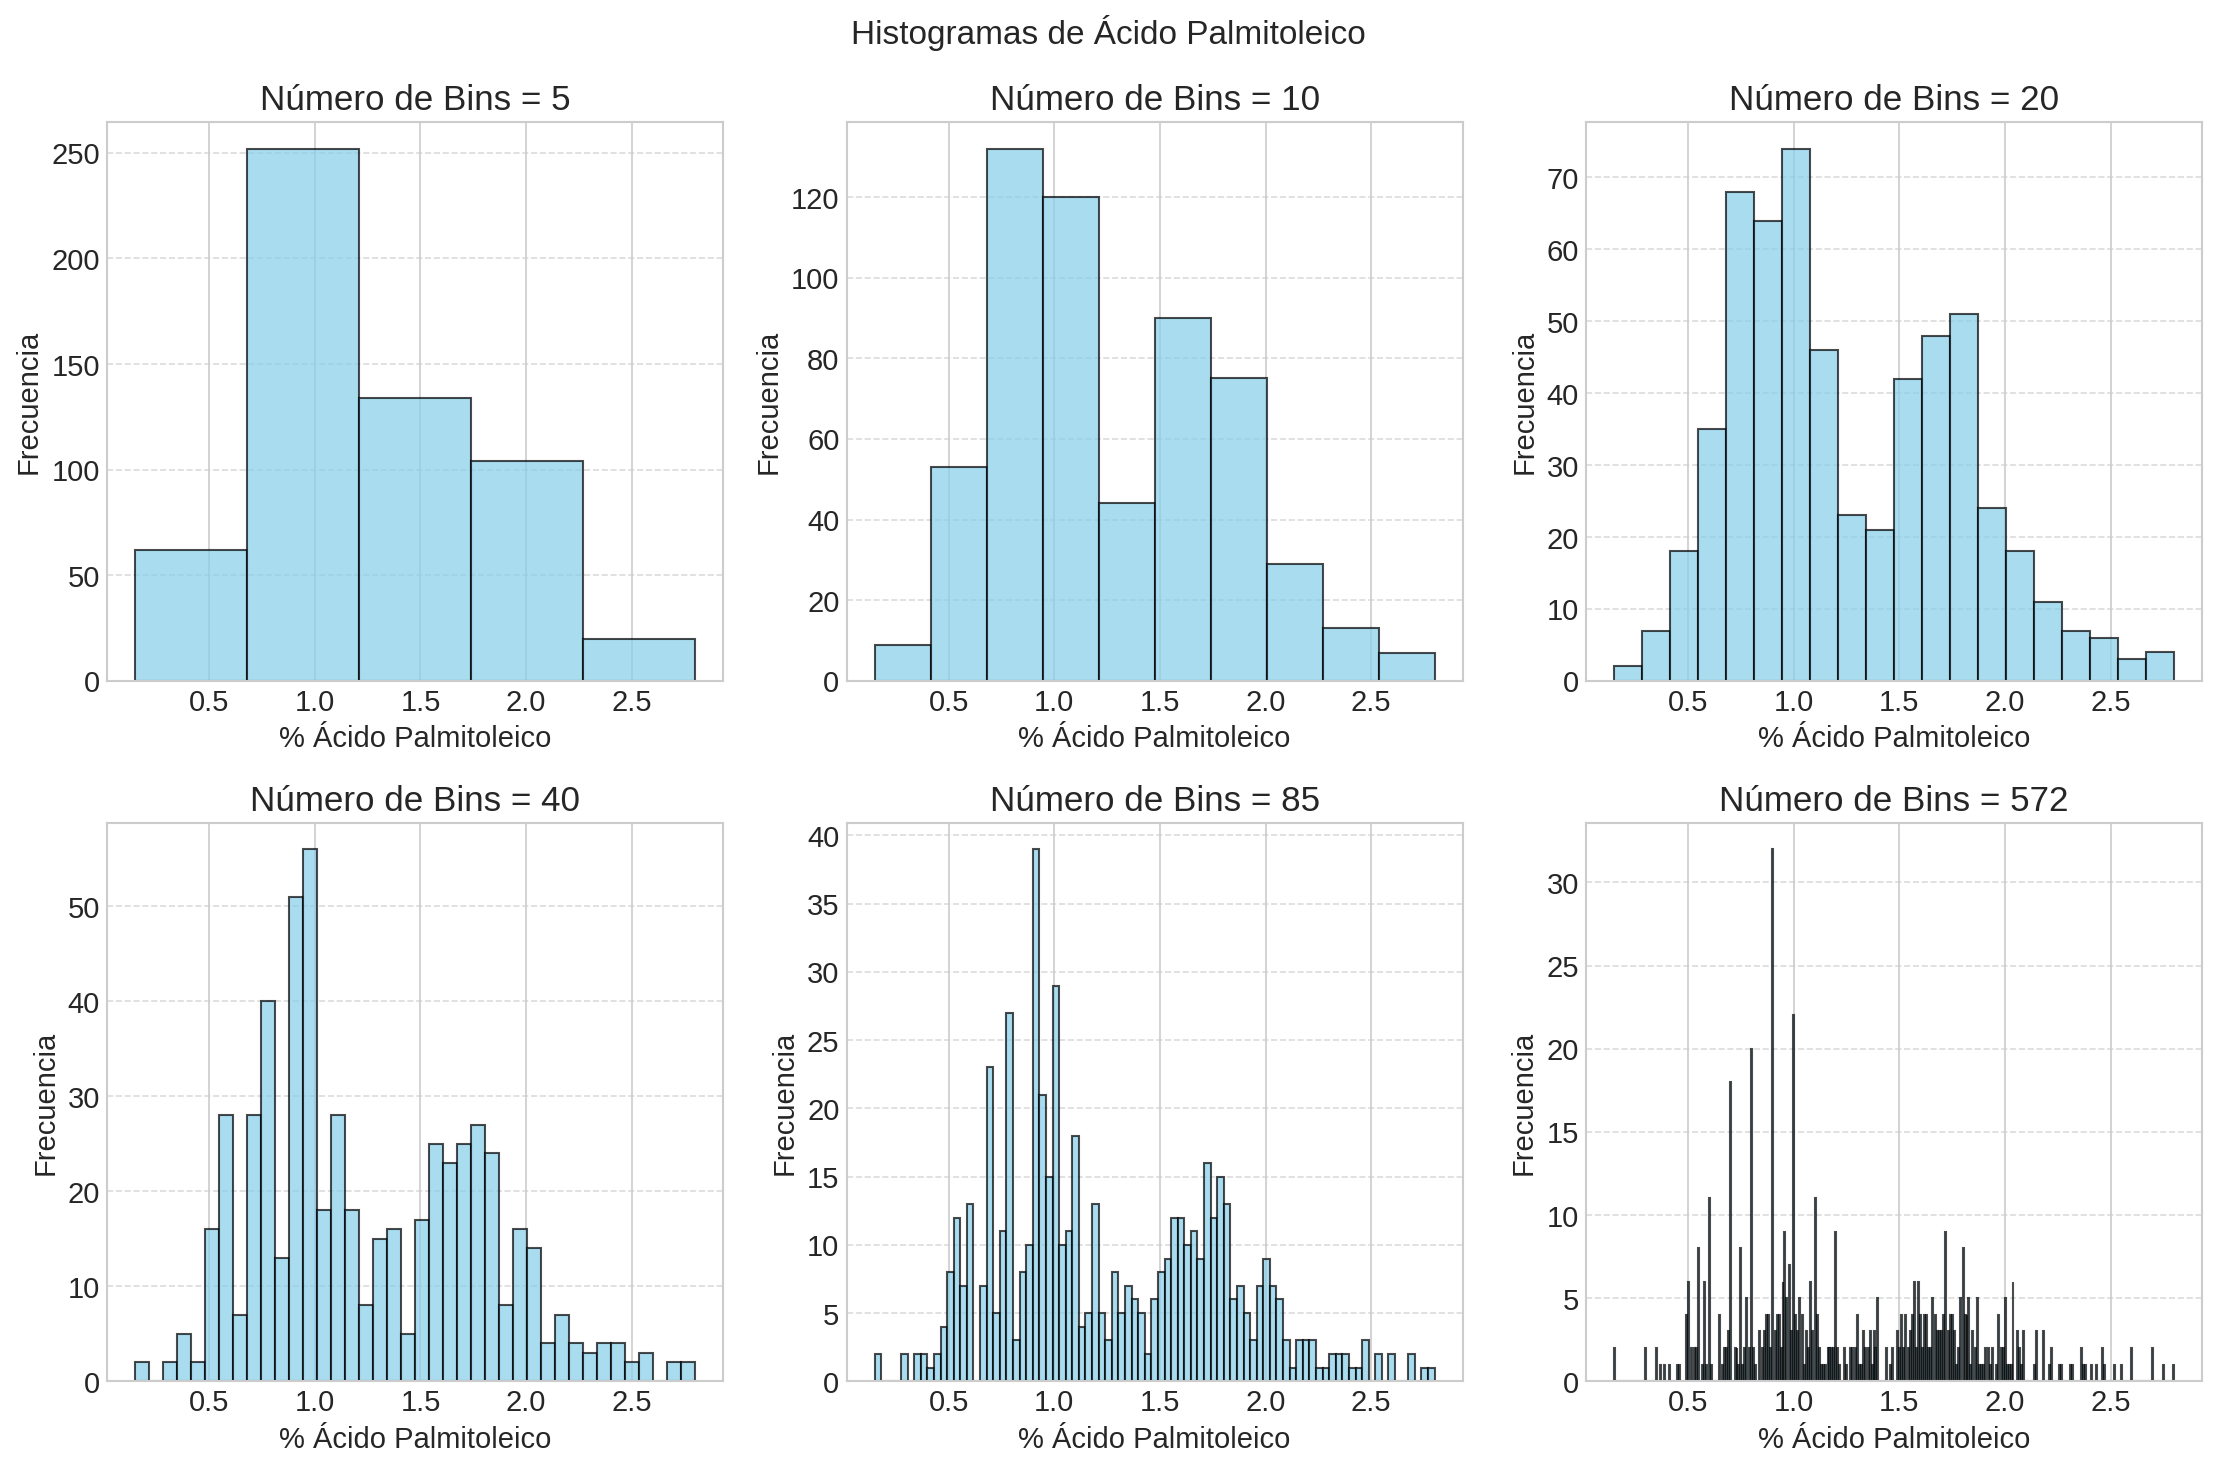

In [42]:

# Supongamos que tienes una serie llamada 'acido_palmitoleico' con los datos del ácido palmitoleico.
# Lista de 6 números de bins diferentes que deseas probar
num_bins_list = [0.01, 0.019, 0.035, 0.07, 0.15, 1]  # Puedes ajustar esto según tus preferencias

# Calcula el número de filas y columnas necesarias para organizar los subplots
num_rows = 2  # Puedes ajustar esto según tus preferencias
num_cols = 3

# Crea subplots para cada valor de num_bins
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Añade un título al conjunto de subplots
fig.suptitle('Histogramas de Ácido Palmitoleico', fontsize=16)

# Itera sobre los diferentes valores de num_bins y crea histogramas en los subplots
for i, num_bins in enumerate(num_bins_list):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    num_bins = int(df_en_porcentaje["palmitoleico"].size * num_bins)
    ax.hist(df_en_porcentaje["palmitoleico"], bins=num_bins, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Número de Bins = {num_bins}')
    ax.set_xlabel('% Ácido Palmitoleico')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta el espacio entre subplots
plt.tight_layout()


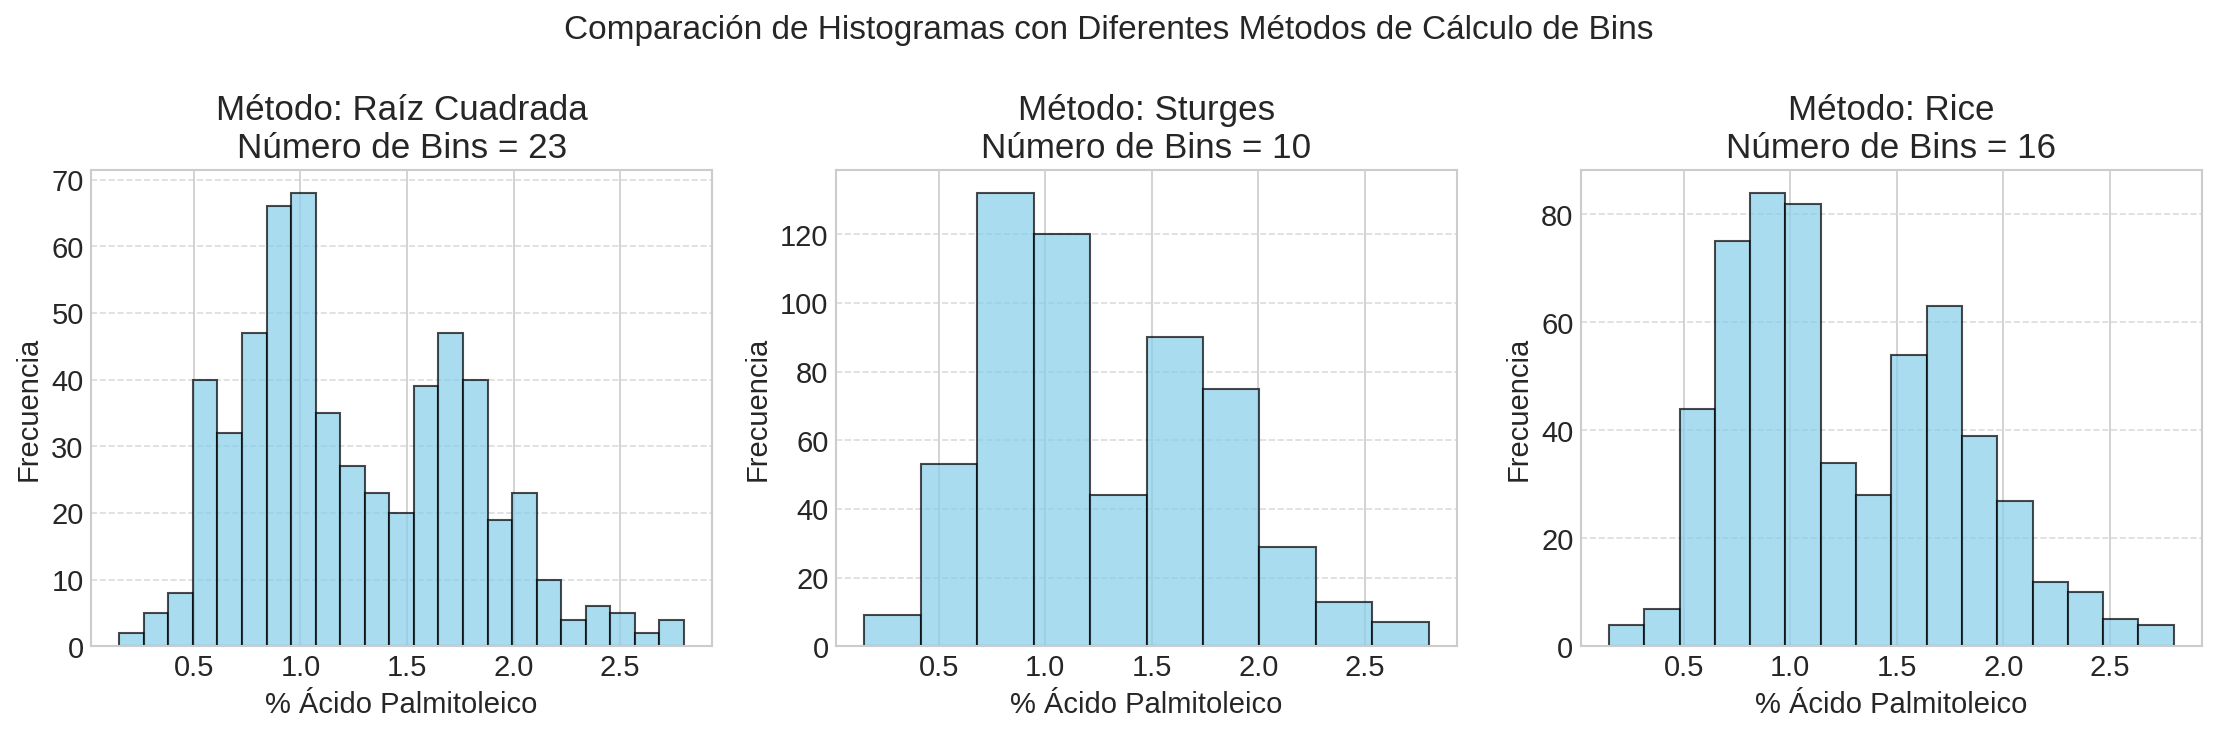

In [43]:

# Lista de métodos para calcular el número de bins
methods = ["Raíz Cuadrada", "Sturges", "Rice"]

# Crea subplots para cada método de cálculo de bins
fig, axes = plt.subplots(1, len(methods), figsize=(15, 5))

# Añade un título al conjunto de subplots
fig.suptitle('Comparación de Histogramas con Diferentes Métodos de Cálculo de Bins', fontsize=16)

# Itera sobre los diferentes métodos y crea histogramas en los subplots
for i, method in enumerate(methods):
    ax = axes[i]
    
    # Calcula el número de bins según el método
    if method == "Raíz Cuadrada":
        num_bins = int(np.sqrt(len(df_en_porcentaje["palmitoleico"])))
    elif method == "Sturges":
        num_bins = int(np.log2(len(df_en_porcentaje["palmitoleico"])) + 1)
    elif method == "Rice":
        num_bins = int(2 * len(df_en_porcentaje["palmitoleico"])**(1/3))
    
    # Crea el histograma
    ax.hist(df_en_porcentaje["palmitoleico"], bins=num_bins, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Método: {method}\nNúmero de Bins = {num_bins}')
    ax.set_xlabel('% Ácido Palmitoleico')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta el espacio entre subplots
plt.tight_layout()


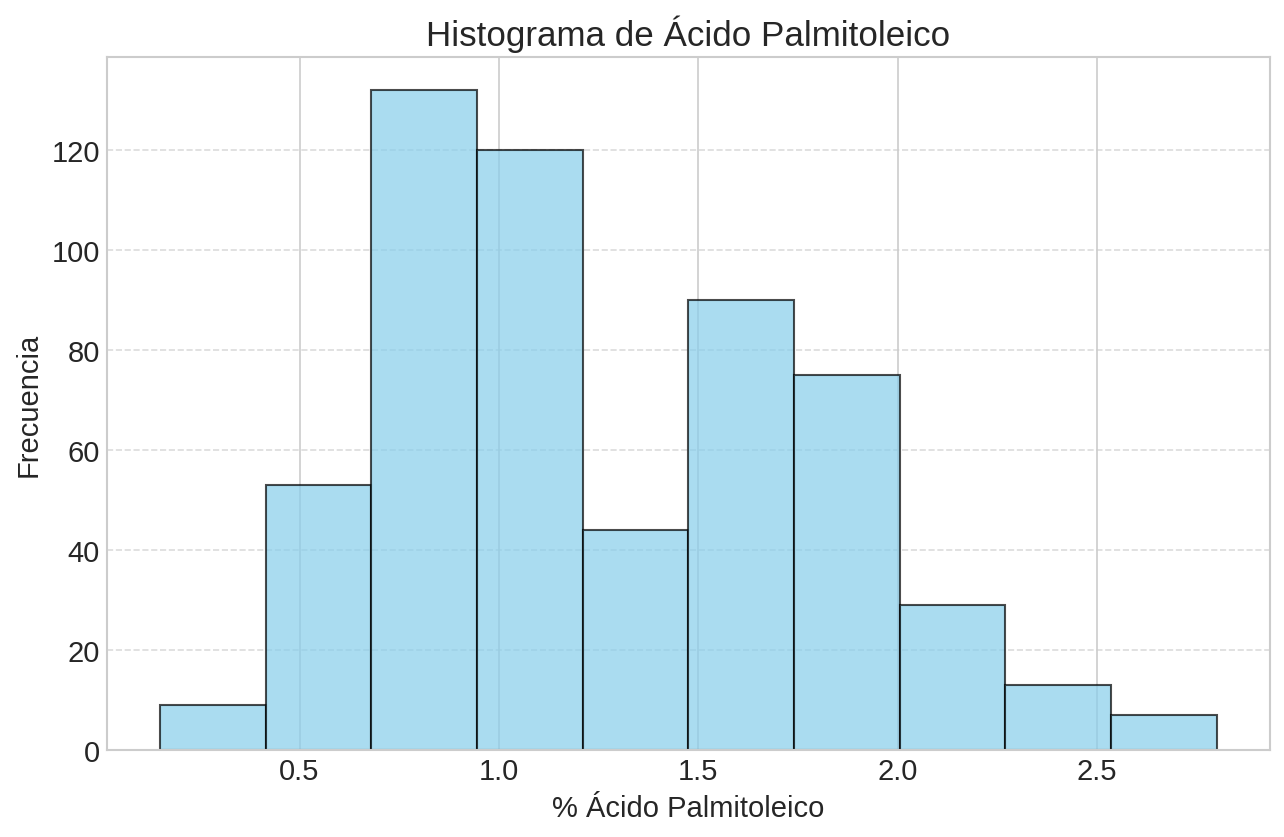

In [44]:

# Crea el histograma
plt.hist(df_en_porcentaje["palmitoleico"], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Personaliza el aspecto del histograma
plt.title('Histograma de Ácido Palmitoleico')
plt.xlabel('% Ácido Palmitoleico')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula en el fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)


Utilizaremos la función `subplots()` para representar cuatro figuras en una matriz de dos por dos.

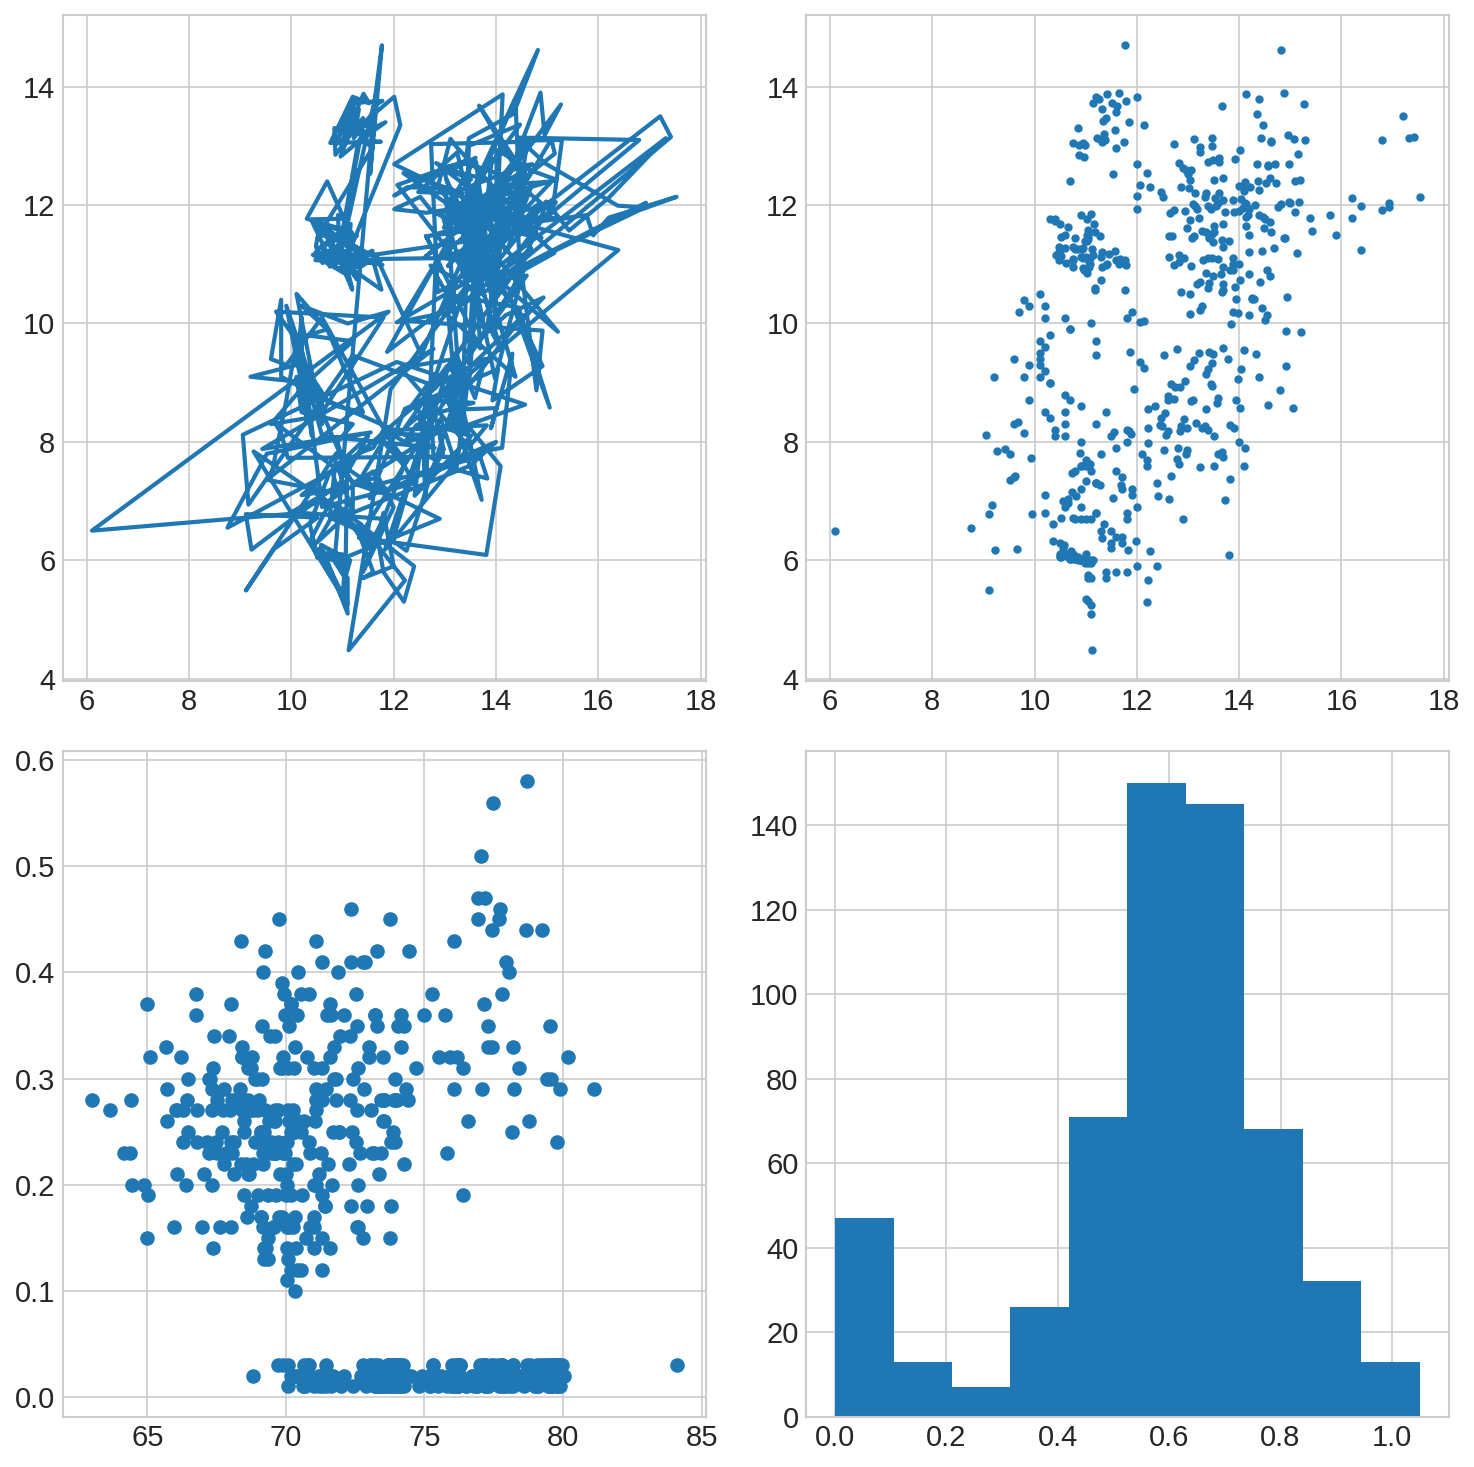

In [45]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(df_en_porcentaje[u'palmítico'], df_en_porcentaje['linoleico'])
axes[0][1].plot(df_en_porcentaje[u'palmítico'], df_en_porcentaje['linoleico'], '.')
axes[1][0].scatter(df_en_porcentaje['oleico'],df_en_porcentaje['eicosenoico'])
axes[1][1].hist(df_en_porcentaje[u'araquídico'])
fig.tight_layout()

Representaremos mediante gráficos de dispersión los ácidos grasos de la lista `acidos_y` frente a los de la lista `acidos_x`. Podemos dibujar los ácidos grasos de la lista `acidos_y`en el eje 'y' y los ácidos grasos de la lista `acidos_x` en el eje 'x'. La representación se hará mediante una matriz de figuras de 3 filas y 2 columnas. Etiquetar convenientemente cada figura. Para no contar el número de elementos en las listas, podemos utilizar la función `enumerate()`.

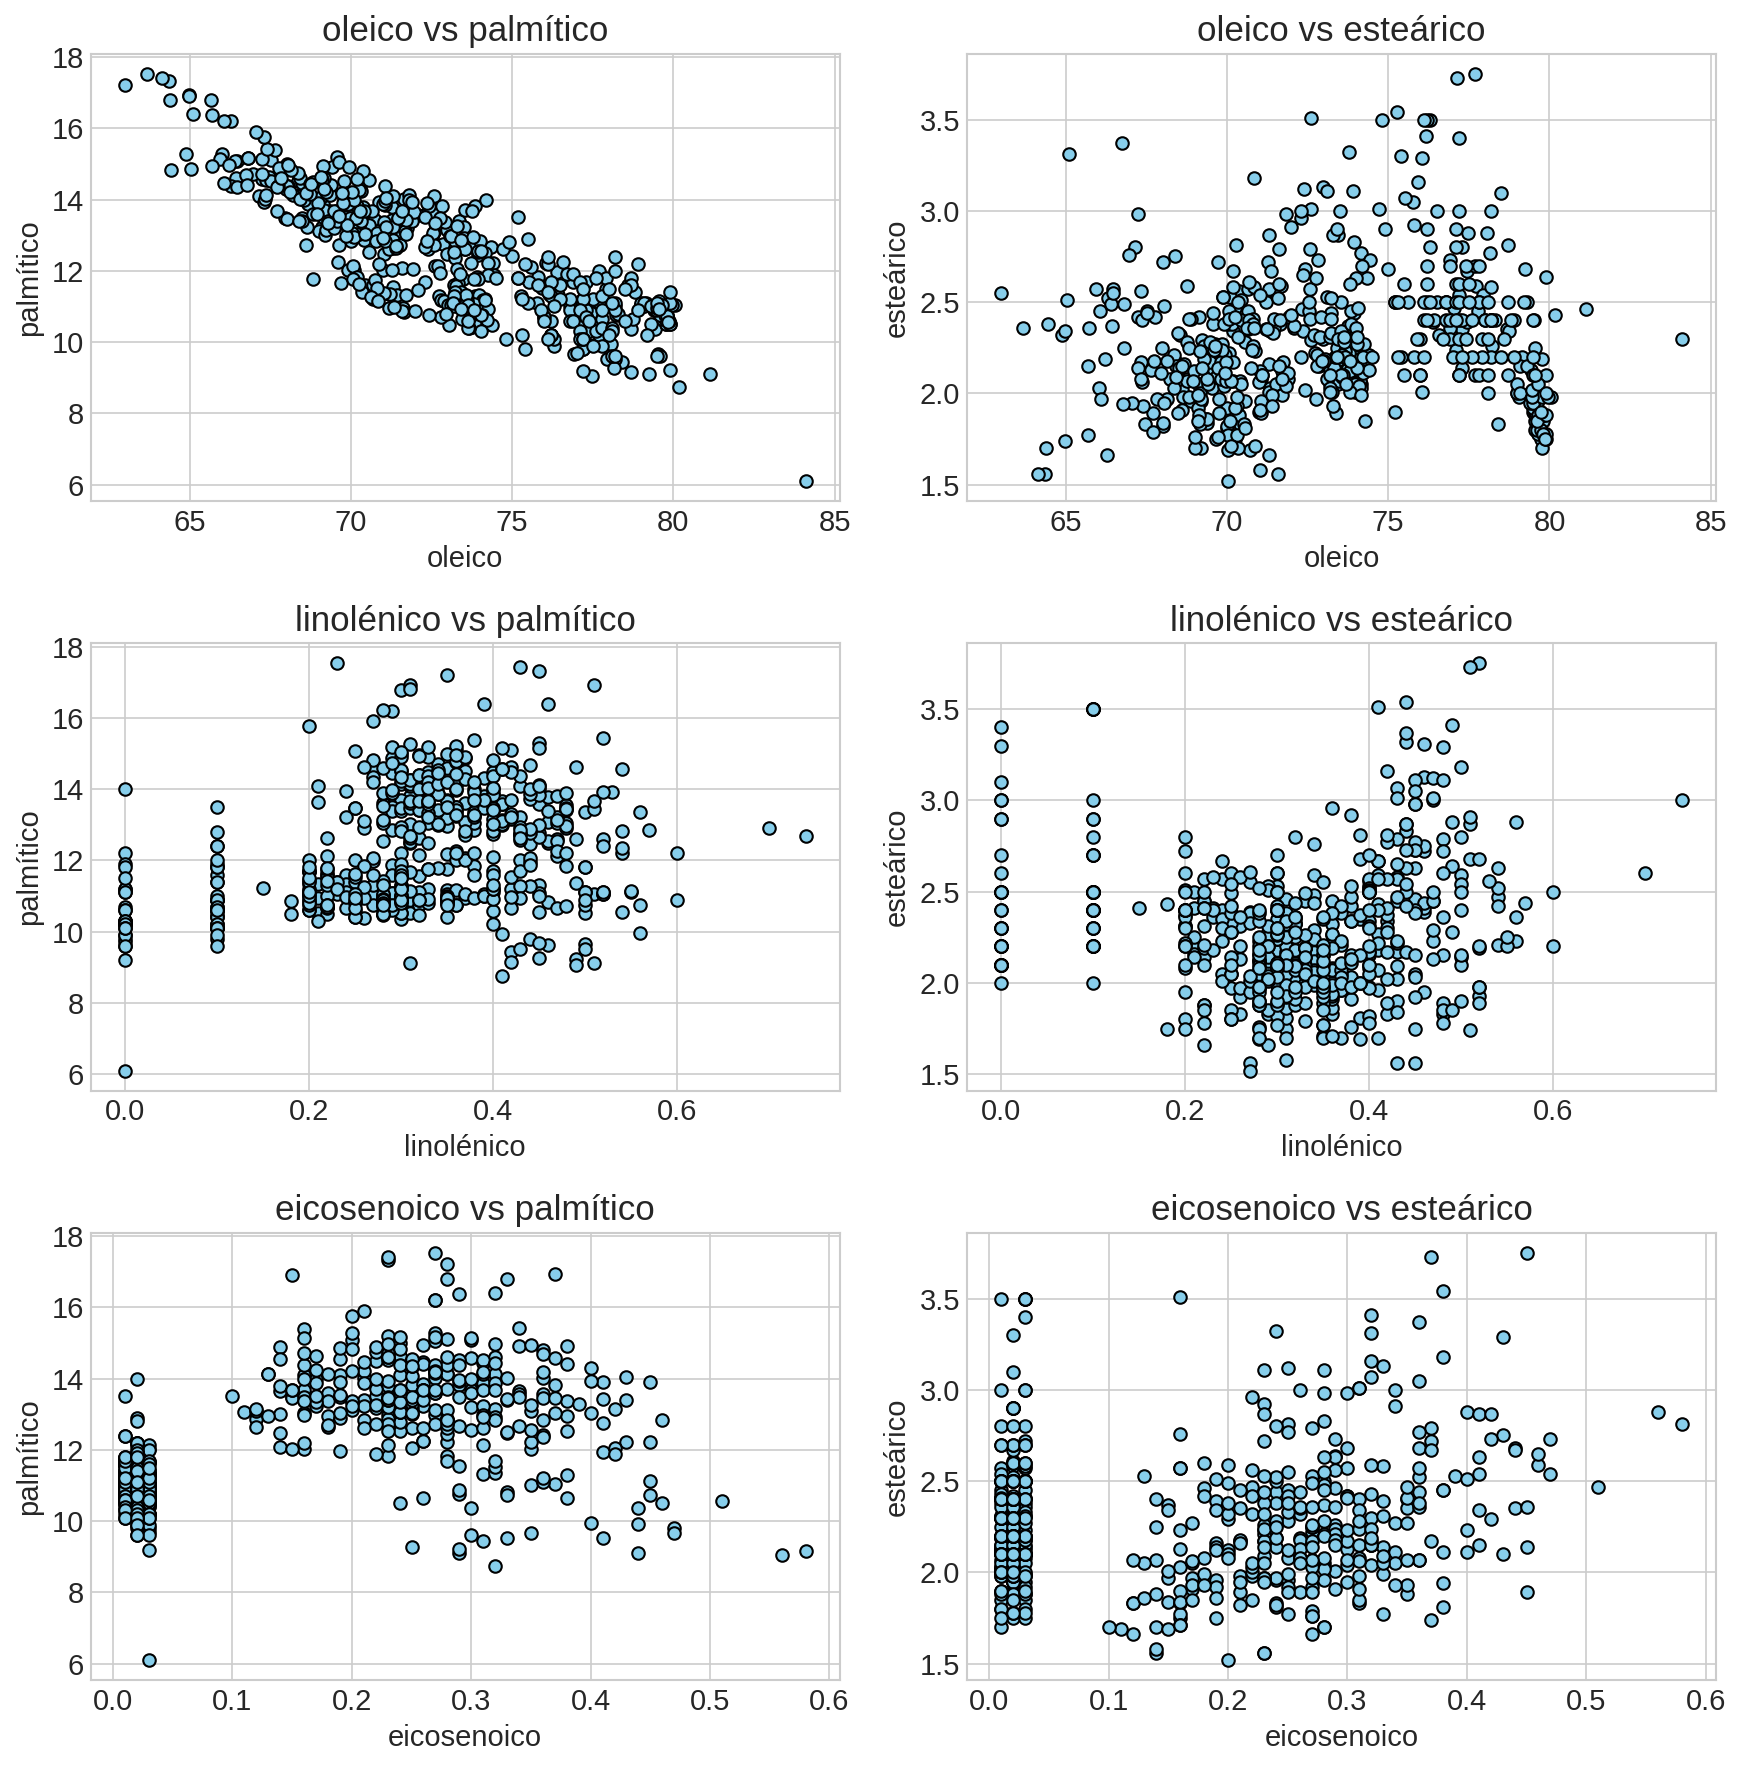

In [46]:
from itertools import product
acidos_x=[u'oleico',u'linolénico',u'eicosenoico']
acidos_y=[u'palmítico',u'esteárico']

# Utilizaremos dos bucles recorriendo la lista de acidos_x y acidos_y
# Crea una lista de etiquetas para las figuras

# Crea subplots en una matriz de 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# Itera sobre las listas de ácidos grasos y etiquetas utilizando enumerate
for i, (acido_x, acido_y) in enumerate(product(acidos_x, acidos_y)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    # Crea el gráfico de dispersión
    ax.scatter(df_en_porcentaje[acido_x], df_en_porcentaje[acido_y], color='skyblue', edgecolor='black')
    ax.set_title(f'{str(acido_x)} vs {str(acido_y)}')
    ax.set_xlabel(acido_x)
    ax.set_ylabel(acido_y)

# Ajusta el espacio entre subplots
plt.tight_layout()

Utilizaremos la función `groupby()` para realizar distintos agrupamientos de los valores de la tabla. En primer lugar, agruparemos por el valor la columna `región`, que nos permitirá dividir el conjunto de datos en tres subconjuntos.

In [47]:
df_en_porcentaje

,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,Puglia-Nord,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,Puglia-Nord,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,Puglia-Nord,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,Puglia-Nord,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...,...,...,...
567,Liguria-Ovest,3,8,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,Liguria-Ovest,3,8,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,Liguria-Ovest,3,8,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,Liguria-Ovest,3,8,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


In [48]:
# Agrupar por la columna 'región'
region = df_en_porcentaje.groupby('región')
# Iterar sobre los grupos resultantes

print(f"El objeto es de tipo: {type(region)}")
display(region)
print(region)

El objeto es de tipo: <class 'pandas.core.groupby.generic.DataFrameGroupBy'>


La función `groupby()` proporciona un objeto de tipo diccionario, donde las claves son los valores que permiten el agrupamiento, y los grupos direccionados por las claves son los correspondientes subconjuntos de la matriz inicial. Podemos direccionar los tres subconjuntos correspondientes a las tres regiones iterando mediante un bucle.

In [49]:
for id_region, grupo in region:
    print(f"El objeto es de tipo: {type(grupo)}")
    print(f'Región: {id_region}')
    display(grupo.head(3))
    

El objeto es de tipo: <class 'pandas.core.frame.DataFrame'>
Región: 1


,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
0,Puglia-Nord,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,Puglia-Nord,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,Puglia-Nord,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29


El objeto es de tipo: <class 'pandas.core.frame.DataFrame'>
Región: 2


,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
323,Sardinia-Interno,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Sardinia-Interno,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Sardinia-Interno,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03


El objeto es de tipo: <class 'pandas.core.frame.DataFrame'>
Región: 3


,procedencia,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
421,Umbria,3,9,10.85,0.7,1.80,79.55,6.05,0.20,0.50,0.01
422,Umbria,3,9,10.85,0.7,1.85,79.55,6.00,0.25,0.55,0.01
423,Umbria,3,9,10.90,0.6,1.90,79.50,6.00,0.28,0.47,0.02


Como vemos, la función `groupby()` no solo realiza un agrupamiento visual, sino que identifica cada uno de los grupos como objetos en sí mismos del tipo `DataFrame`, sobre los que podemos operar. Por ejemplo, podemos utilizar la función `describe()` para analizar cada una de las regiones de un modo inmediato.

In [50]:
for id_region, grupo in region:
    print(f"El objeto describe es de tipo: {type(grupo.describe())}")
    print(f'Región: {id_region}')
    display(grupo.describe())
    

El objeto describe es de tipo: <class 'pandas.core.frame.DataFrame'>
Región: 1


,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
count,323.0,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.0,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
std,0.0,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
min,1.0,1.000000,8.750000,0.350000,1.520000,63.000000,4.480000,0.200000,0.320000,0.100000
25%,1.0,2.500000,12.680000,1.215000,2.015000,68.830000,8.555000,0.320000,0.560000,0.220000
50%,1.0,3.000000,13.460000,1.630000,2.230000,70.300000,10.900000,0.370000,0.620000,0.270000
75%,1.0,3.000000,14.190000,1.850000,2.495000,72.835000,12.025000,0.440000,0.690000,0.320000
max,1.0,4.000000,17.530000,2.800000,3.750000,81.130000,14.620000,0.740000,1.020000,0.580000


El objeto describe es de tipo: <class 'pandas.core.frame.DataFrame'>
Región: 2


,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2.0,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
std,0.0,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
min,2.0,5.000000,10.300000,0.350000,1.990000,68.820000,10.570000,0.150000,0.450000,0.010000
25%,2.0,5.000000,10.852500,0.882500,2.120000,71.372500,11.122500,0.230000,0.660000,0.010000
50%,2.0,5.000000,11.075000,0.960000,2.220000,73.255000,11.465000,0.270000,0.720000,0.020000
75%,2.0,6.000000,11.372500,1.040000,2.395000,73.810000,13.065000,0.300000,0.810000,0.020000
max,2.0,6.000000,12.130000,1.350000,2.720000,74.390000,14.700000,0.430000,1.050000,0.030000


El objeto describe es de tipo: <class 'pandas.core.frame.DataFrame'>
Región: 3


,región,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
count,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,3.0,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735
std,0.0,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298
min,3.0,7.000000,6.100000,0.150000,1.700000,73.400000,5.100000,0.000000,0.000000,0.010000
25%,3.0,7.000000,10.600000,0.690000,2.000000,76.800000,6.020000,0.100000,0.100000,0.010000
50%,3.0,8.000000,10.900000,0.800000,2.300000,78.000000,6.800000,0.200000,0.380000,0.020000
75%,3.0,9.000000,11.250000,1.000000,2.500000,79.500000,8.250000,0.350000,0.595000,0.025000
max,3.0,9.000000,14.000000,1.800000,3.500000,84.100000,10.500000,0.700000,1.000000,0.030000


Un ejemplo de lo que podemos hacer es iterar sobre el conjunto de series de valores para cada columna en cada región, y calcular la desviación estándar mediante la función `std()`. Observa el tipo del resultado como conjunto de desviaciones estándar para cada columna.

In [51]:
# Excluir las columnas 'área' y 'región' del DataFrame antes de calcular las desviaciones estándar
# ya que no tiene sentido mirar la desviación para estos parametros
columnas_a_excluir = ['área', 'región']
columnas_calculo = [col for col in df.columns if col not in columnas_a_excluir]
# Calcula las desviaciones estándar para cada columna
std_dict = {}
for id_region, grupo in region:
    std = grupo[columnas_calculo].std()
    std_dict[id_region] = std

# Crea un nuevo DataFrame a partir del diccionario de desviaciones estándar
df_std = pd.DataFrame(std_dict)
# Trasponemos para que se parezca a la tabla de abajo y la colocación sea similar 
# al DataFrame df
display(df_std.T)

/home/alourido/anaconda3/envs/VD/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
1,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Además, pandas permite reunir los resultados de ejecutar `std()` en un nuevo objeto del tipo `DataFrame`. Y lo hace él todo. Podemos simplemente aplicar la función `std()` sobre el resultado del agrupamiento realizado mediante `groupby()`.

In [52]:
# Calcular las desviaciones estándar utilizando groupby()
desviaciones_estandar_por_region = df_en_porcentaje.groupby('región')[columnas_calculo].std()
display(desviaciones_estandar_por_region)

,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
región,,,,,,,,
1,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Podemos utilizar la función `agreggate()` para aplicar distintas funciones de cálculo a los datos del nuevo objeto, por ejemplo `np.sum()` `np.mean()`. La aplicación de estas funciones se realiza columna a columna. 

In [61]:
datos_percentage_mean = region.aggregate(np.mean)
display(datos_percentage_mean)

,área,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
región,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [53]:
# Aplicar diferentes funciones de cálculo usando agg()
resultados = df_en_porcentaje.groupby('región')[columnas_calculo].agg([np.sum, np.mean, np.max, np.min,np.std])

# Usamos el traspuesto ya que no se pude visualizar la tabla entera de la otra manera
display(resultados.T)

región                        1            2             3
palmítico    sum    4303.290000  1089.120000   1653.150000
             mean     13.322879    11.113469     10.948013
             amax     17.530000    12.130000     14.000000
             amin      8.750000    10.300000      6.100000
             std       1.529349     0.404111      0.825635
palmitoleico sum     500.010000    94.810000    126.440000
             mean      1.548019     0.967449      0.837351
             amax      2.800000     1.350000      1.800000
             amin      0.350000     0.350000      0.150000
             std       0.507237     0.138514      0.264388
esteárico    sum     738.940000   221.660000    348.510000
             mean      2.287740     2.261837      2.308013
             amax      3.750000     2.720000      3.500000
             amin      1.520000     1.990000      1.700000
             std       0.398709     0.176363      0.389560
oleico       sum   22933.030000  7122.660000  11767.510000
             mean     71.000093    72.680204     77.930530
             amax     81.130000    74.390000     84.100000
             amin     63.000000    68.820000     73.400000
             std       3.451431     1.418783      1.648155
linoleico    sum    3338.200000  1172.600000   1097.820000
             mean     10.334985    11.965306      7.270331
             amax     14.620000    14.700000     10.500000
             amin      4.480000    10.570000      5.100000
             std       2.106730     1.072336      1.431226
linolénico   sum     122.950000    26.550000     32.900000
             mean      0.380650     0.270918      0.217881
             amax      0.740000     0.430000      0.700000
             amin      0.200000     0.150000      0.000000
             std       0.079727     0.053844      0.168865
araquídico   sum     203.870000    71.710000     56.740000
             mean      0.631176     0.731735      0.375762
             amax      1.020000     1.050000      1.000000
             amin      0.320000     0.450000      0.000000
             std       0.111644     0.118826      0.293586
eicosenoico  sum      88.250000     1.900000      2.980000
             mean      0.273220     0.019388      0.019735
             amax      0.580000     0.030000      0.030000
             amin      0.100000     0.010000      0.010000
             std       0.083915     0.007436      0.007298

In [70]:
# region.aggregate(lambda x: x.oleico.mean()) 
# Agrupamos por región
region = df_en_porcentaje.groupby('región', as_index=True)
region.oleico.aggregate(lambda x: x.mean())  
# ¿Qué estamos haciendo?
# es una función lambda que se aplica a cada grupo. 
# region es un objeto de tipo GroupBy que se ha creado previamente utilizando el método groupby() en un DataFrame. 
# Representa grupos de datos separados por la columna 'región'.
# Esta función calcula la media (promedio) de la columna 'oleico' para cada grupo de datos.

región
1    71.000093
2    72.680204
3    77.930530
Name: oleico, dtype: float64

También podemos utilizar la función `apply()` para aplicar una función determinada al nuevo objeto. Por ejemplo, podemos volver a realizar la media sobre los valores de las columnas de cada una de las regiones. Aunque pueden coincidir en algunos resultados, la función `apply()` opera sobre cada grupo, mientras que `aggregate()` opera sobre cada una de las columnas.

In [72]:
region.oleico.apply(lambda x: x.mean())
# debido a que a como se agrupa el  region se tiene que hacer region 

región
1    71.000093
2    72.680204
3    77.930530
Name: oleico, dtype: float64

Renombraremos las columnas de la tabla datos_std para añadir después de cada nombre la extensión '`_std`'. Para ello podemos iterar sobre todas las cadenas de `acidos`, añadiendo la subcadena `_std` después de cada cadena. Esto se puede hacer mediante una sencilla estructura diccionario en la que hacemos corresponder a cada cadena de ácidos una nueva cadena en la que añadimos '`_std`'. La función a utilizar es `rename()` donde haremos `inplace = True` para hacer la sustitución sobre la misma estructura de datos, y no sobre una copia.

In [86]:
desviaciones_estandar_por_region = df_en_porcentaje.groupby('región')[columnas_calculo].std()
display(desviaciones_estandar_por_region)

# Agregar "_std" al final de cada nombre de columna
desviaciones_estandar_por_region.columns = [col + '_std' for col in desviaciones_estandar_por_region.columns]
display(desviaciones_estandar_por_region)


media_por_region = df_en_porcentaje.groupby('región')[columnas_calculo].mean()
# Agregar "_mean" al final de cada nombre de columna
media_por_region.columns = [col + '_mean' for col in media_por_region.columns]
display(media_por_region)


,palmítico,palmitoleico,esteárico,oleico,linoleico,linolénico,araquídico,eicosenoico
región,,,,,,,,
1,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


,palmítico_std,palmitoleico_std,esteárico_std,oleico_std,linoleico_std,linolénico_std,araquídico_std,eicosenoico_std
región,,,,,,,,
1,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


,palmítico_mean,palmitoleico_mean,esteárico_mean,oleico_mean,linoleico_mean,linolénico_mean,araquídico_mean,eicosenoico_mean
región,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Haremos una sencilla operación de unión entre tablas para disponer de una nueva tabla en la que representamos la media y la desviación estándar para el ácido oleico en cada una de las tres regiones. Para ello extraemos dos estructuras dataframe a partir de `datos_mean` y `datos_std` para la columna de interés. Después utilizamos la función `join()` para unir ambas estructuras.

In [87]:
# Unir los DataFrames usando la función join() en la columna 'región'
datos_mean_std = media_por_region.join(desviaciones_estandar_por_region, on='región')
display(datos_mean_std)

,palmítico_mean,palmitoleico_mean,esteárico_mean,oleico_mean,linoleico_mean,linolénico_mean,araquídico_mean,eicosenoico_mean,palmítico_std,palmitoleico_std,esteárico_std,oleico_std,linoleico_std,linolénico_std,araquídico_std,eicosenoico_std
región,,,,,,,,,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


## 2. Análisis exploratorio de datos en una dimensión

In [88]:
clave_region=[1,2,3]
valor_region=['Sud','Sardinia','Nord']
dict_region={e[0]:e[1] for e in zip(clave_region,valor_region)}
dict_region

{1: 'Sud', 2: 'Sardinia', 3: 'Nord'}

Vamos a volver sobre la tabla en la que representábamos los valores medios de cada ácido graso en cada región. En esa tabla aparecían también los valores medios del área, lo que es un tanto anómalo. Extraeremos una nueva tabla en la que sólo aparecerán los valores medios correspondientes a ácidos grasos.

In [93]:

# Ya lo había hecho antes este paso
display(media_por_region.head())


,palmítico_mean,palmitoleico_mean,esteárico_mean,oleico_mean,linoleico_mean,linolénico_mean,araquídico_mean,eicosenoico_mean
región,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Realizaremos un gráfico de barras con los porcentajes relativos de ácidos grasos. Podemos utilizar la opción kind='barh'. En el gráfico llamaremos a la región 1 'Sud', a la 2 'Sardinia' y a la 3 'Nord', de acuerdo con el mapa inicialmente proporcionado.

In [94]:

# Para sacar fuera de la gráfica la leyenda y facilitar la inspección
ax.legend(loc='right',bbox_to_anchor=(1.3,0.5))
ax.set_xlim([0,100])

(0.0, 100.0)

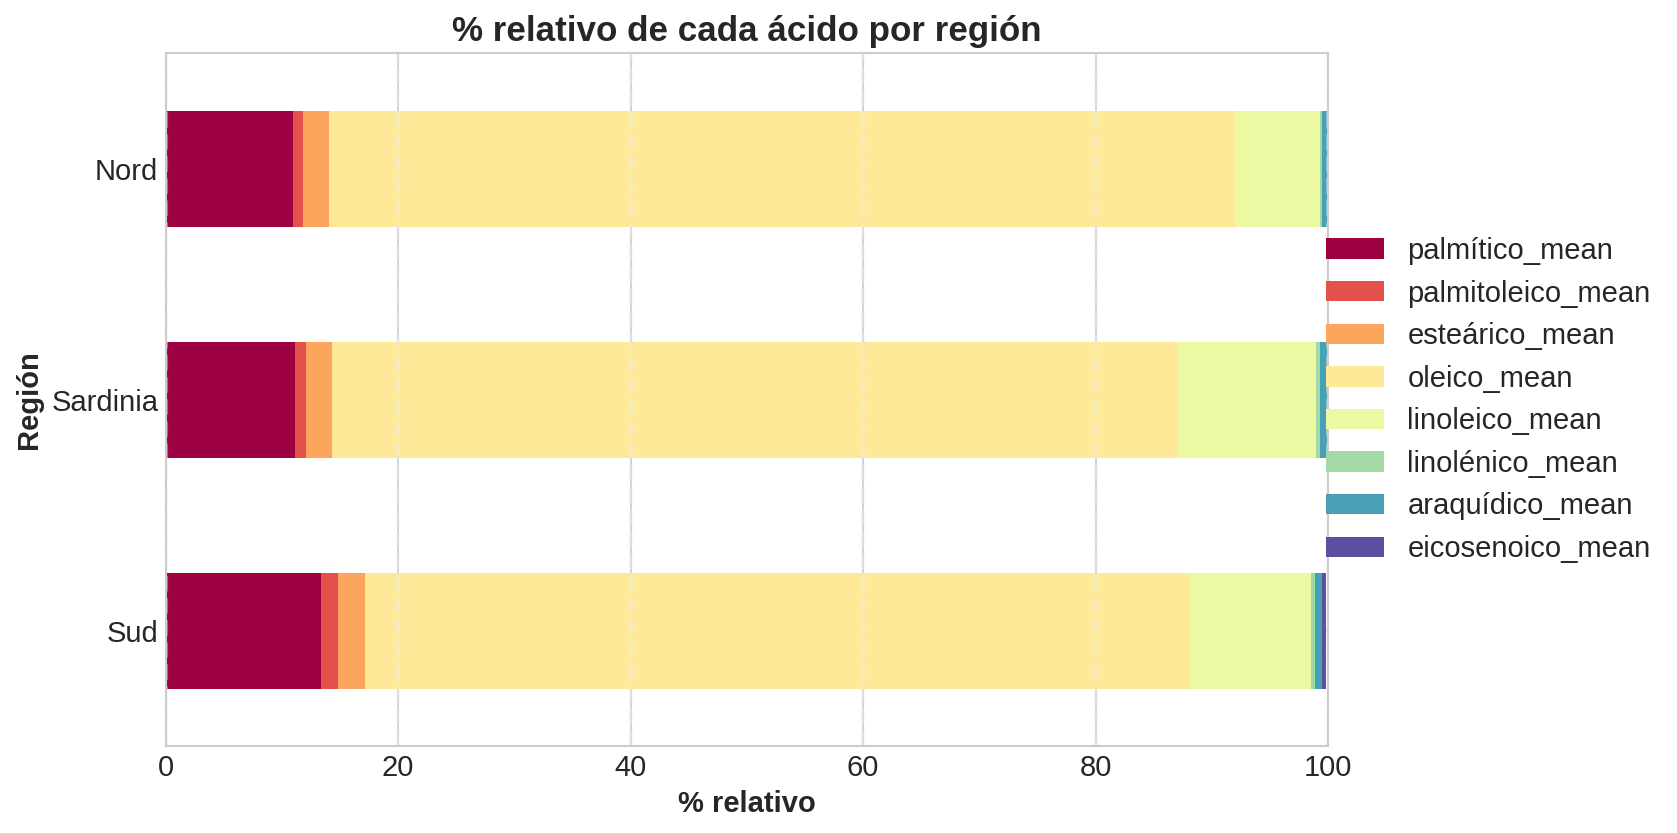

In [129]:


# Función para configurar el estilo de la gráfica
def configurar_grafica(ax,dict_name):
    ax.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
    ax.set_xlim([0, 100])
    ax.set_title("% relativo de cada ácido por región", weight='bold')
    ax.set_xlabel("% relativo", weight='bold')
    ax.set_ylabel("Región", weight='bold')
    ax.set_yticklabels([name for name in list(dict_name.values())])
    
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


# colores = ['#FF5733', '#33FF57', '#5733FF', '#FF33A1', '#33A1FF', '#A1FF33', '#33FFFF', '#FFFF33']
plt.style.use('seaborn-whitegrid')

# Representamos la gráfica directamente desde el DataFrame agrupado
ax = media_por_region.plot(kind='barh', stacked=True,cmap='Spectral') #cmap='viridis')
# Agregamos anotaciones en las barras no se ven correctametn ensucian mas el grafico
# for i in ax.patches:
#    width, height = i.get_width(), i.get_height()
#    x, y = i.get_xy() 
#    ax.annotate(f'{width:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

# Configuramos el estilo de la gráfica
configurar_grafica(ax,dict_region)

# Mostramos la gráfica
plt.show()


Hemos representado las proporciones de ácidos grasos en cada región. Representaremos ahora para cada ácido graso, su distribución por regiones. Para ello, en primer lugar podemos dividir una figura en tantas subfiguras como ácidos grasos, mediante la función `subplots()`. Un lazo nos permitirá recorrer cada una de las subfiguras, y en cada una de ellas representaremos tres histogramas, cada uno de ellos representando el histograma del correspondiente ácido graso en una de las tres regiones.

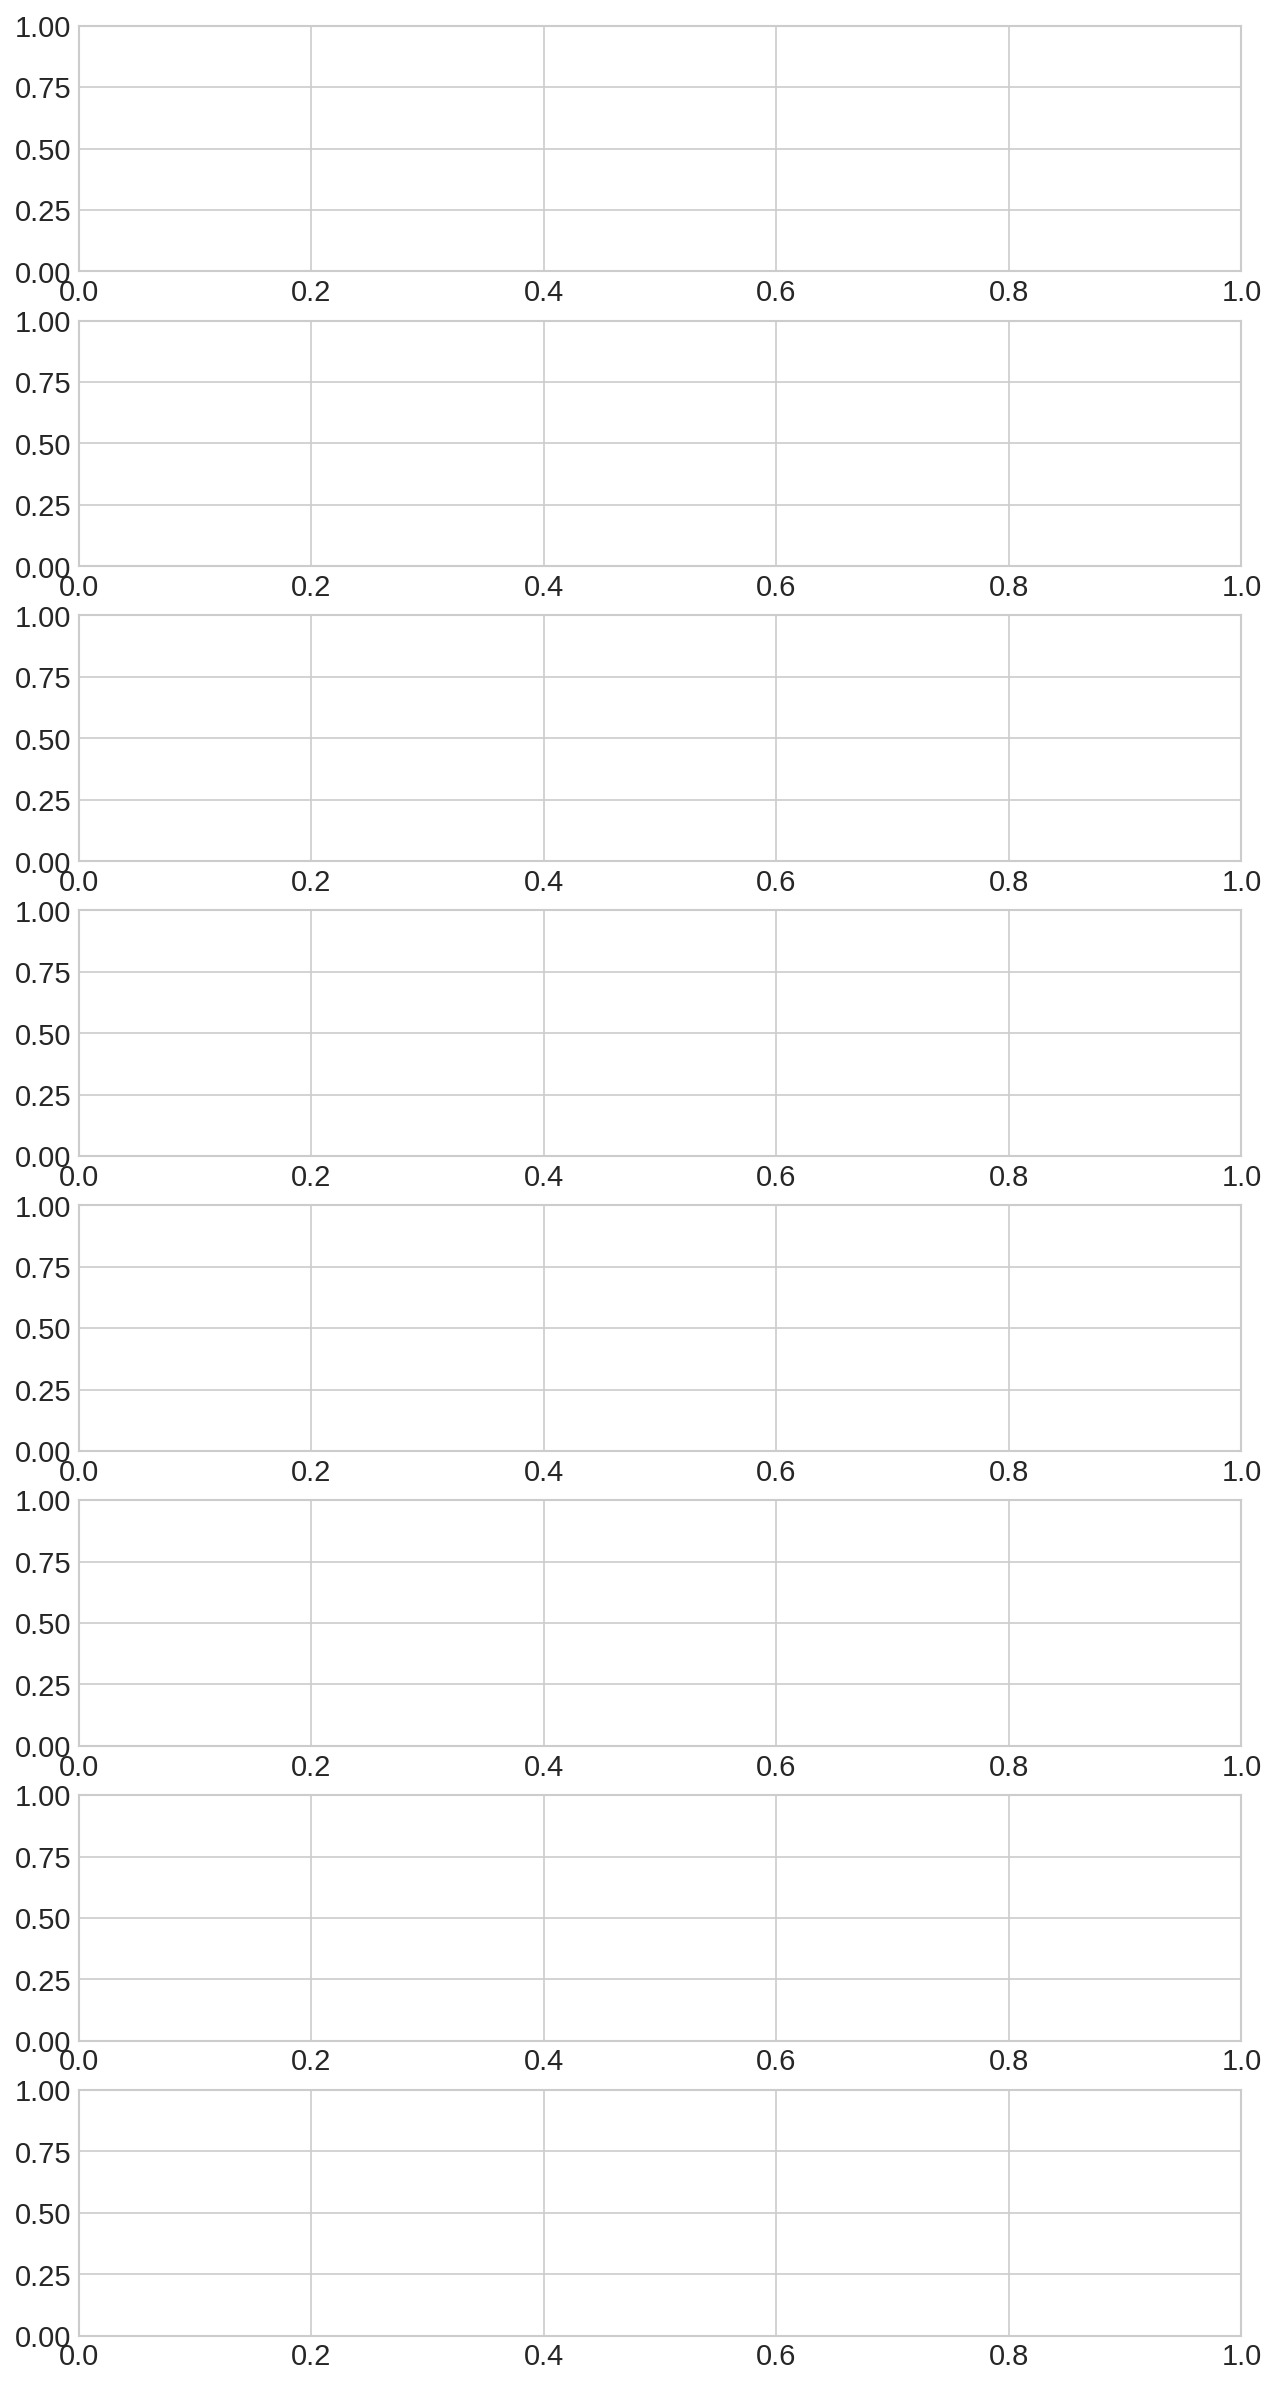

In [130]:
fig, axes=plt.subplots(figsize=(10,20), nrows=len(acidos), ncols=1)



Podemos calcular la frecuencia relativa acumulada del ácido graso eicosenoico respecto a un valor determinado (p.ej. 0.05) como la fracción de valores menores a 0.05 respecto al total. Para ello, podemos obtener la serie de condiciones a partir de la columna del ácido graso eicosenoico, lo que nos devolverá una serie de valores de verdad cierto o falso. Si luego sumamos mediante la función `np.sum()` los valores ciertos obtenemos el número total de valores menores que 0.05. Si aplicamos la función `np.mean()` obtenemos el valor deseado de la frecuencia relativa acumulada.

Con pandas podemos indexar un objeto mediante una condición. Interpreta el siguiente código

In [ ]:
bajo=datos[datos[u'eicosenoico'] < 0.02]
pd.crosstab(bajo[u'área'],bajo[u'región'])

Hemos visto que el ácido oleico domina a los demás, lo que dificulta el análisis del resto de ácidos grasos. Eliminaremos el ácido oleico y representaremos los demás de nuevo mediante un diagrama de barras. ¿Qué podemos decir respecto al ácido eicosenoico?

In [ ]:
menosoleico=[u'palmítico',u'palmitoleico',u'esteárico',u'linoleico',u'linolénico',u'araquídico',u'eicosenoico']


Representa tres gráficos, uno por cada región, con los diagramas de cajas para cada uno de los ácidos grasos, menos el oleico. ¿Podemos decir algo respecto al ácido linoleico?

In [ ]:
plt.figure(figsize=(28,5))
for clave, group in datos.groupby(u'región'):


Representa un diagrama de coordenadas paralelas para los distintos ácidos grasos, mediante la función parallel_coordinates(). Puede ser útil normalizar los datos para que la media sea cero. Juega con distintos valores del parámetro alpha para poder distinguir mejor los distintos haces de valores.

In [ ]:
from pandas.plotting import parallel_coordinates


Representa un diagrama de dispersión del ácido linoleico frente al araquídico, diferenciando las tres regiones. Este gráfico es útil cuando queremos enfatizar un aspecto visual de los datos en una justificación. ¿Qué podemos decir respecto a la separabilidad de las distintas regiones? 

Representa mediante diagramas de dispersión los distintos ácidos grasos dos a dos. No es necesario permutar los parámetros en la representación. Indaga sobre la separabilidad observada.

Hasta aquí hemos realizado un análisis de los distintos aceites según su región de procedencia. Podríamos extender el trabajo a las distintas áreas de procedencia, analizando igualmente la separabilidad. ¿Qué podríamos concluir?